# Libraries

In [1]:
import joblib
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, Pool, CatBoostRegressor, CatBoostRanker
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare Data

In [2]:
# Load from pkl
xall, yall, harai = joblib.load("./data.pkl")

In [3]:
# Input features
xall

,raceid,horseid,racedate,futan,umaban,wakuban,blinker,age,bataijyu,zogen,...,grade_5,wintime_5,lap_s3_5,lap_s4_5,lap_l3_5,lap_l4_5,f,ff,m,mf
0,2020010506010101,2017103291,20200105,54.0,1,1,0,3.0,432.0,4.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220057e+09,1.120002e+09
1,2020010506010101,2017101861,20200105,54.0,2,1,0,3.0,424.0,-4.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.140004e+09,1.220063e+09,1.120002e+09
2,2020010506010101,2017103186,20200105,54.0,3,2,0,3.0,458.0,0.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220061e+09,1.140006e+09
3,2020010506010101,2017102095,20200105,53.0,4,2,0,3.0,464.0,10.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.120002e+09,1.220062e+09,1.120002e+09
4,2020010506010101,2017103287,20200105,52.0,5,3,1,3.0,460.0,-2.0,...,None,NaN,NaN,NaN,NaN,NaN,1.120002e+09,1.140006e+09,1.220062e+09,1.140005e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143318,2022122809060912,2018105223,20221228,53.0,12,6,0,4.0,452.0,0.0,...,E,69.4,33.6,45.3,35.8,46.9,1.140007e+09,1.140005e+09,1.220065e+09,1.140006e+09
143319,2022122809060912,2017106137,20221228,56.0,13,7,0,5.0,492.0,6.0,...,E,67.3,32.8,44.1,34.5,45.4,1.120002e+09,1.140004e+09,1.220050e+09,1.120002e+09
143320,2022122809060912,2017100461,20221228,56.0,14,7,0,5.0,504.0,4.0,...,E,80.4,35.6,47.1,33.3,44.8,1.120002e+09,1.140004e+09,1.220055e+09,1.120002e+09
143321,2022122809060912,2018106389,20221228,52.0,15,8,0,4.0,434.0,2.0,...,E,68.4,33.7,45.0,34.7,45.7,1.120002e+09,1.140005e+09,1.220063e+09,1.120002e+09


In [4]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
print(xall.columns)

Index(['raceid', 'horseid', 'racedate', 'futan', 'umaban', 'wakuban',
       'blinker', 'age', 'bataijyu', 'zogen',
       ...
       'grade_5', 'wintime_5', 'lap_s3_5', 'lap_s4_5', 'lap_l3_5', 'lap_l4_5',
       'f', 'ff', 'm', 'mf'],
      dtype='object', length=224)


In [5]:
# # Output feature: finishing position (0: race not finished)
yall

0          2
1         12
2          3
3         11
4          8
          ..
143318    12
143319    16
143320    11
143321     7
143322     8
Name: jyuni, Length: 143323, dtype: int64

In [6]:
# Payout
harai

,RaceID,TorokuTosu,SyussoTosu,FuseirituFlag,TokubaraiFlag,HenkanFlag,HenkanUma,HenkanWaku,HenkanDoWaku,PayTansyo,...,PayReserved1,PayUmatan,PaySanrenpuku,PaySanrentan,Year,MonthDay,JyoCD,Kaiji,Nichiji,RaceNum
0,2020010606010203,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '09', 'Pay': '000000200', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0913', 'Pay': '000000510', 'Ninki':...","[{'Kumi': '080913', 'Pay': '000001270', 'Ninki...","[{'Kumi': '091308', 'Pay': '000003840', 'Ninki...",2020,0106,06,01,02,03
1,2022010507010112,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '13', 'Pay': '000001530', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '1315', 'Pay': '000004070', 'Ninki':...","[{'Kumi': '061315', 'Pay': '000002720', 'Ninki...","[{'Kumi': '131506', 'Pay': '000026590', 'Ninki...",2022,0105,07,01,01,12
2,2020010506010101,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '07', 'Pay': '000000360', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0701', 'Pay': '000003650', 'Ninki':...","[{'Kumi': '010307', 'Pay': '000098210', 'Ninki...","[{'Kumi': '070103', 'Pay': '000280650', 'Ninki...",2020,0105,06,01,01,01
3,2020010606010204,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '12', 'Pay': '000000280', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '1211', 'Pay': '000003040', 'Ninki':...","[{'Kumi': '031112', 'Pay': '000000920', 'Ninki...","[{'Kumi': '121103', 'Pay': '000008340', 'Ninki...",2020,0106,06,01,02,04
4,2020010606010205,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '07', 'Pay': '000000380', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0716', 'Pay': '000001730', 'Ninki':...","[{'Kumi': '070916', 'Pay': '000002130', 'Ninki...","[{'Kumi': '071609', 'Pay': '000009690', 'Ninki...",2020,0106,06,01,02,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,2022122806050903,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '01', 'Pay': '000000600', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0107', 'Pay': '000004600', 'Ninki':...","[{'Kumi': '010307', 'Pay': '000023600', 'Ninki...","[{'Kumi': '010703', 'Pay': '000094870', 'Ninki...",2022,1228,06,05,09,03
10364,2022122806050902,16,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[{'Umaban': '04', 'Pay': '000000750', 'Ninki':...",...,"[{'Kumi': ' ', 'Pay': ' ', 'Ninki':...","[{'Kumi': '0406', 'Pay': '000030980', 'Ninki':...","[{'Kumi': '040611', 'Pay': '000013110', 'Ninki...","[{'Kumi': '040611', 'Pay': '000138570', 'Ninki...",2022,1228,06,05,09,02
10365,2022122809060911,13,13,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
print(harai.columns)

Index(['RaceID', 'TorokuTosu', 'SyussoTosu', 'FuseirituFlag', 'TokubaraiFlag',
       'HenkanFlag', 'HenkanUma', 'HenkanWaku', 'HenkanDoWaku', 'PayTansyo',
       'PayFukusyo', 'PayWakuren', 'PayUmaren', 'PayWide', 'PayReserved1',
       'PayUmatan', 'PaySanrenpuku', 'PaySanrentan', 'Year', 'MonthDay',
       'JyoCD', 'Kaiji', 'Nichiji', 'RaceNum'],
      dtype='object')


In [8]:
print(harai.columns)

Index(['RaceID', 'TorokuTosu', 'SyussoTosu', 'FuseirituFlag', 'TokubaraiFlag',
       'HenkanFlag', 'HenkanUma', 'HenkanWaku', 'HenkanDoWaku', 'PayTansyo',
       'PayFukusyo', 'PayWakuren', 'PayUmaren', 'PayWide', 'PayReserved1',
       'PayUmatan', 'PaySanrenpuku', 'PaySanrentan', 'Year', 'MonthDay',
       'JyoCD', 'Kaiji', 'Nichiji', 'RaceNum'],
      dtype='object')


In [9]:
print(harai["PaySanrentan"][0])

[{'Kumi': '091308', 'Pay': '000003840', 'Ninki': '0006'}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}, {'Kumi': '      ', 'Pay': '         ', 'Ninki': '    '}]


In [10]:
'''
Preprocess data
'''

# Convert string values to float
for col in xall.columns:
    if xall[col].dtype == "object":
        # Convert to numeric where possible
        xall[col] = pd.to_numeric(xall[col], errors='coerce')
        # Replace NaN (from non-numeric values) with 0
        xall[col] = xall[col].fillna(0)
        print(f"Converted column: {col}")

Converted column: KisyuCode
Converted column: TozaiCD
Converted column: ChokyosiCode
Converted column: BanusiCode
Converted column: course
Converted column: cls
Converted column: grade
Converted column: BreederCode
Converted column: KisyuCode_1
Converted column: course_1
Converted column: cls_1
Converted column: grade_1
Converted column: KisyuCode_2
Converted column: course_2
Converted column: cls_2
Converted column: grade_2
Converted column: KisyuCode_3
Converted column: course_3
Converted column: cls_3
Converted column: grade_3
Converted column: KisyuCode_4
Converted column: course_4
Converted column: cls_4
Converted column: grade_4
Converted column: KisyuCode_5
Converted column: course_5
Converted column: cls_5
Converted column: grade_5


In [11]:
'''
Split into Train-Test data
'''
# Number of days to use of testing
TEST_DAYS = 90

# Date at which the data splits
rd = xall["racedate"].unique()[-TEST_DAYS] 

# split data
xtrain = xall[xall['racedate']<rd].reset_index(drop=True).copy()
ytrain = yall[xtrain.index].reset_index(drop=True).copy()
xtest = xall[xall['racedate']>=rd].reset_index(drop=True).copy()
ytest = yall[xtest.index].reset_index(drop=True).copy()

In [12]:
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(104436, 224) (104436,) (38887, 224) (38887,)


# Evaluation Baseline

In [13]:
def evaluate(xtest, ytest, ypred, harai, apply_bet):
    # Real rankings - jyuni is matrix of shape (num_races × 18)
    tmp = xtest.copy()
    tmp["jyuni"] = ytest
    tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
    jyuni = np.array([[tmp[i][j] if j < len(tmp[i]) else j+1 for j in range(18)]
                      for i in range(tmp.shape[0])])

    # Predicted ranking -  'pred' is a matrix of shape (num_races × 18)
    tmp = xtest.copy()
    tmp["pred"] = ypred
    tmp = tmp.groupby("raceid", as_index=False).apply(
        lambda x: np.argsort(np.argsort(-x["pred"].values)) + 1
    )
    pred = np.array([[tmp[i][j] if j < len(tmp[i]) else j+1 for j in range(18)]
                     for i in range(tmp.shape[0])])

    # df_bet: extract unique raceid rows
    df_bet = xtest[["raceid"]].groupby("raceid", as_index=False).apply(lambda x: x.iloc[0])

    # Align payout data
    harai = harai.copy()
    harai.columns = [x.replace("RaceID", "raceid") for x in harai.columns]
    harai.raceid = harai.raceid.astype(int)

    mrr, total_payout, profit,return_rate, hitrate = apply_bet(pred, jyuni, df_bet, harai, xtest)

    return mrr, total_payout, profit, return_rate, hitrate


def apply_bet_tansyo(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx = np.where(jyuni[i] == 1)[0]
        if idx.size > 0:
            res.append(1.0 / pred[i, idx[0]])
    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Tansyo: #1
    predicted_bet = [[f"{np.where(pred[i] == 1)[0][0] + 1:02}"] for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for raceid in df_bet["raceid"]:
        pred_tickets = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [x["Umaban"] for x in tmp["PayTansyo"] if x["Umaban"].strip() != ""]
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayTansyo"]
               if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(int(tmp["HenkanUma"][int(p)-1]) for p in pred_tickets)

        res.append({
            "raceid": raceid,
            "pred": pred_tickets,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int).values

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values

    harai_val = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu))
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai_val))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val), np.mean(tekichu)


def apply_bet_fukusyo(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx = np.where(jyuni[i] <= 3)[0]
        if idx.size > 0:
            res.append(np.mean([1.0 / pred[i, j] for j in idx]))
    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Fukusyo: #1
    predicted_bet = [[f"{np.argsort(pred[i])[0] + 1:02}"] for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for raceid in df_bet["raceid"]:
        pred_tickets = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [x["Umaban"] for x in tmp["PayFukusyo"] if x["Umaban"].strip() != ""]
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayFukusyo"]
               if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(int(tmp["HenkanUma"][int(p)-1]) for p in pred_tickets)

        res.append({
            "raceid": raceid,
            "pred": pred_tickets,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int).values

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values

    harai_val = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu))
    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai_val))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val), np.mean(tekichu)


def apply_bet_fukusyo_three(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx = np.where(jyuni[i] <= 3)[0]
        if idx.size > 0:
            res.append(np.mean([1.0 / pred[i, j] for j in idx]))
    mrr = np.mean(res)
    print("MRR:", mrr)

    # Predicted bet: Fukusyo on top 3 predicted horses
    predicted_bet = [
        [f"{h+1:02}" for h in np.argsort(pred[i])[:3]]
        for i in range(pred.shape[0])
    ]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for raceid in df_bet["raceid"]:
        pred_tickets = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [x["Umaban"] for x in tmp["PayFukusyo"] if x["Umaban"].strip() != ""]
        pay = {x["Umaban"]: int(x["Pay"]) for x in tmp["PayFukusyo"]
               if x["Umaban"].strip() != "" and x["Pay"].strip() != ""}

        henkan = sum(int(tmp["HenkanUma"][int(p)-1]) for p in pred_tickets)

        res.append({
            "raceid": raceid,
            "pred": pred_tickets,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int).values

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values

    harai_val = df_res.apply(lambda x: len(x["pred"]), axis=1).values * 100

    print("Number of races:", df_res.shape[0])
    print("Number of hits:", np.sum(tekichu))
    print("Hit rate:", np.mean(tekichu))
    print("Total payout:", np.sum(modoshi))
    print("Return rate:", np.mean(modoshi / harai_val))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val), np.mean(tekichu)


def apply_bet_wakuren(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    tmp = xtest.copy()
    tmp["wakuban"] = (tmp["umaban"].astype(int) + 1) // 2

    tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["wakuban"].values)

    bracket_ids = np.array([
        [tmp[i][j] if j < len(tmp[i]) else -1 for j in range(18)]
        for i in range(tmp.shape[0])
    ])
    res = []

    for i in range(jyuni.shape[0]):
        true_idx = np.where(jyuni[i] <= 2)[0]
        if true_idx.size < 2:
            continue

        true_brackets = set(bracket_ids[i, true_idx])

        br_rank = {}
        for b in np.unique(bracket_ids[i]):
            if b == -1:
                continue
            br_rank[b] = np.min(pred[i, bracket_ids[i] == b])

        pair_rank = max(br_rank[b] for b in true_brackets)
        res.append(1 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)
    
    # Predicted bet - Wakuren: #1 and #2 brackets (any order)
    predicted_bet = []
    for i in range(pred.shape[0]):
        br_rank = {}
        for b in np.unique(bracket_ids[i]):
            if b == -1:
                continue
            br_rank[b] = np.min(pred[i, bracket_ids[i] == b])

        top2_brackets = sorted(br_rank, key=br_rank.get)[:2]
        predicted_bet.append(top2_brackets)

    df_bet["predicted_bet"] = predicted_bet
    
    res = []
    for _, row in df_bet.iterrows():
        raceid = row["raceid"]
        pred_brackets = row["predicted_bet"]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        # True winners (pay table)
        true = [x["Umaban"] for x in tmp["PayWakuren"] if x["Umaban"].strip() != ""]

        # Pay table
        pay = {
            x["Umaban"]: int(x["Pay"])
            for x in tmp["PayWakuren"]
            if x["Umaban"].strip() != "" and x["Pay"].strip() != ""
        }

        # Create pred_key in general: sorted numbers concatenated
        pred_key = "".join(sorted(str(b) for b in pred_brackets))

        # Henkan ignored for Wakuren (bracket-based)
        henkan = 0

        res.append({
            "raceid": raceid,
            "pred": pred_key,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(lambda x: x["pred"] in x["true"], axis=1).astype(int).values
    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1),
          np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100, axis=1).values
    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai), np.std(modoshi / harai, ddof=1),
          np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai), np.mean(tekichu)



def apply_bet_umaren(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        true_idx = np.where(jyuni[i] <= 2)[0]
        if true_idx.size < 2:
            continue

        pred_ranks = [pred[i, idx] for idx in true_idx]
        pair_rank = max(pred_ranks)
        res.append(1 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Umaren: #1 and #2 (any order)
    predicted_bet = [list(np.argsort(pred[i])[:2] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet

    res = []
    for _, row in df_bet.iterrows():
        raceid = row["raceid"]
        pred_pair = row["predicted_bet"]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]]))
            for x in tmp["PayUmaren"]
            if x["Kumi"].strip() != ""
        ]

        pay = {
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]])): int(x["Pay"])
            for x in tmp["PayUmaren"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred_pair
            if 1 <= h <= len(tmp["HenkanUma"])
        )

        pred_key = "".join(sorted(f"{h:02}" for h in pred_pair))

        res.append({
            "raceid": raceid,
            "pred": pred_key,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print("Hit rate", np.mean(tekichu), np.std(tekichu, ddof=1),
          np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0]))

    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(len(df_res)) * 100

    print("Total payout", np.sum(modoshi))
    print("Return rate", np.mean(modoshi / harai),
          np.std(modoshi / harai, ddof=1),
          np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0]))
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi/harai), np.mean(tekichu)


def apply_bet_wide(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        top3_idx = np.where(jyuni[i] <= 3)[0]
        if top3_idx.size < 2:
            continue

        best_score = 0.0
        for a in range(len(top3_idx)):
            for b in range(a + 1, len(top3_idx)):
                h1, h2 = top3_idx[a], top3_idx[b]
                pair_rank = max(pred[i, h1], pred[i, h2])
                best_score = max(best_score, 1.0 / pair_rank)

        res.append(best_score)

    mrr = np.mean(res)
    print("MRR:", mrr)

    # Prediction
    predicted_bet = []
    for i in range(pred.shape[0]):
        top3 = np.argsort(pred[i])[:3]
        pairs = [[top3[j] + 1, top3[k] + 1] for j in range(3) for k in range(j + 1, 3)]
        predicted_bet.append(pairs)

    df_bet["predicted_bet"] = predicted_bet

    # Compute Payout
    res = []
    for raceid in df_bet["raceid"]:
        pred_pairs = df_bet[df_bet.raceid == raceid]["predicted_bet"].values[0]

        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            continue

        true = [
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]]))
            for x in tmp["PayWide"]
            if x["Kumi"].strip() != ""
        ]

        pay = {
            "".join(sorted([x["Kumi"][:2], x["Kumi"][2:]])): int(x["Pay"])
            for x in tmp["PayWide"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        flat_horses = sorted(set(h for pair in pred_pairs for h in pair))
        henkan = sum(int(tmp["HenkanUma"][h - 1]) for h in flat_horses)

        pred_str = [
            "".join(sorted([f"{a:02}", f"{b:02}"]))
            for a, b in pred_pairs
        ]

        res.append({
            "raceid": raceid,
            "pred": pred_str,
            "true": true,
            "pay": pay,
            "henkan": henkan
        })

    df_res = pd.DataFrame(res)

    # Compute Hit Rate
    tekichu = df_res.apply(lambda x: any(p in x["true"] for p in x["pred"]), axis=1).astype(int)

    modoshi = df_res.apply(
        lambda x: sum(x["pay"].get(p, 0) for p in x["pred"]) + x["henkan"] * 100,
        axis=1
    ).values * 1 / 3

    harai_val = np.full(df_res.shape[0], 3 * 100) * 1 / 3

    print("Number of races:", df_res.shape[0])
    print("Number of hits:", tekichu.sum())
    print("Hit rate:", tekichu.mean())
    print("Total payout:", modoshi.sum())
    print("Return rate:", np.mean(modoshi / harai_val),
          np.std(modoshi / harai_val, ddof=1),
          np.std(modoshi / harai_val, ddof=1) / np.sqrt(df_res.shape[0]))

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai_val), np.mean(modoshi / harai_val), np.mean(tekichu)


def apply_bet_sanrenpuku(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        top3_idx = np.where(jyuni[i] <= 3)[0]
        if top3_idx.size < 3:
            continue

        ranks = pred[i, top3_idx]
        comb_rank = np.max(ranks)
        res.append(1.0 / comb_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)
    

    # Predicted bet - Sanrenpuku: #1 and #2 and #3 (any order)
    predicted_bet = [list(np.argsort(pred[i])[:3] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"] == raceid]["predicted_bet"].values[0]

        # Select target race
        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            "".join(sorted([
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ]))
            for x in tmp["PaySanrenpuku"]
            if x["Kumi"].strip() != ""
        ]
        
        # Compute Pay for the true winners
        pay = {
            "".join(sorted([
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ])): int(x["Pay"])
            for x in tmp["PaySanrenpuku"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred
            if (
                h - 1 < len(tmp["HenkanUma"])
                and str(tmp["HenkanUma"][h - 1]).strip() != ""
            )
        )

        # convert rankings from int to string
        pred_str = "".join(sorted(f"{h:02}" for h in pred))
           
        res.append({
            "pred": pred_str,
            "true": true,
            "pay": pay,
            "henkan": henkan,
            "raceid": raceid
        })     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print(
        "Hit rate",
        np.mean(tekichu),
        np.std(tekichu, ddof=1),
        np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0])
    )

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print(
        "Return rate",
        np.mean(modoshi / harai),
        np.std(modoshi / harai, ddof=1),
        np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0])
    )
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai), np.mean(tekichu)


def apply_bet_umatan(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        idx_1 = np.where(jyuni[i] == 1)[0]
        idx_2 = np.where(jyuni[i] == 2)[0]

        if idx_1.size == 0 or idx_2.size == 0:
            continue

        h1 = idx_1[0]
        h2 = idx_2[0]

        pair_rank = max(pred[i, h1], pred[i, h2])
        res.append(1.0 / pair_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Umatan: #1 and #2 (exact order)
    predicted_bet = [list(np.argsort(pred[i])[:2] + 1) for i in range(pred.shape[0])]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"] == raceid]["predicted_bet"].values[0]

        # Select target race
        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            (x["Kumi"][:2], x["Kumi"][2:])
            for x in tmp["PayUmatan"]
            if x["Kumi"].strip() != ""
        ]

        # Compute Pay for the true winners
        pay = {
            (x["Kumi"][:2], x["Kumi"][2:]): int(x["Pay"])
            for x in tmp["PayUmatan"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred
            if h - 1 < len(tmp["HenkanUma"]) and str(tmp["HenkanUma"][h - 1]).strip() != ""
        )

        # convert rankings from int to string
        pred_str = (f"{pred[0]:02}", f"{pred[1]:02}")

        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print(
        "Hit rate",
        np.mean(tekichu),
        np.std(tekichu, ddof=1),
        np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0])
    )

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print(
        "Return rate",
        np.mean(modoshi / harai),
        np.std(modoshi / harai, ddof=1),
        np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0])
    )
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai), np.mean(tekichu)


def apply_bet_sanrentan(pred, jyuni, df_bet, harai, xtest):
    # Compute MRR
    res = []
    for i in range(jyuni.shape[0]):
        first = np.where(jyuni[i] == 1)[0]
        second = np.where(jyuni[i] == 2)[0]
        third = np.where(jyuni[i] == 3)[0]

        if first.size == 0 or second.size == 0 or third.size == 0:
            continue

        r1 = pred[i, first[0]]
        r2 = pred[i, second[0]]
        r3 = pred[i, third[0]]

        comb_rank = max(r1, r2, r3)
        res.append(1.0 / comb_rank)

    mrr = np.mean(res)
    print("MRR: ", mrr)

    # Predicted bet - Sanrentan: #1 and #2 and #3 (exact order)
    predicted_bet = [
        list(np.argsort(pred[i])[:3] + 1)
        for i in range(pred.shape[0])
    ]
    df_bet["predicted_bet"] = predicted_bet
 
    # Compute Payout
    res = []
    for raceid in df_bet["raceid"].tolist():
        # Get predictions
        pred = df_bet[df_bet["raceid"] == raceid]["predicted_bet"].values[0]

        # Select target race
        try:
            tmp = harai[harai.raceid == raceid].iloc[0].to_dict()
        except:
            print("Payout data for this race does not exist.", raceid)
            continue

        # Check true winners (list because ties possible)
        true = [
            (
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            )
            for x in tmp["PaySanrentan"]
            if x["Kumi"].strip() != ""
        ]

        # Compute Pay for the true winners
        pay = {
            (
                x["Kumi"][:2],
                x["Kumi"][2:4],
                x["Kumi"][4:6],
            ): int(x["Pay"])
            for x in tmp["PaySanrentan"]
            if x["Kumi"].strip() != "" and x["Pay"].strip() != ""
        }

        # Compute Henkan (refunded amounts)
        henkan = sum(
            int(tmp["HenkanUma"][h - 1])
            for h in pred
            if h - 1 < len(tmp["HenkanUma"]) and str(tmp["HenkanUma"][h - 1]).strip() != ""
        )

        # convert rankings from int to string
        pred_str = tuple(f"{x:02}" for x in pred)
           
        res.append({"pred": pred_str, "true": true, "pay": pay, "henkan": henkan, "raceid": raceid})     

    df_res = pd.DataFrame(res)
    
    # Compute Hit rate (accuracy)
    tekichu = df_res.apply(
        lambda x: x["pred"] in x["true"],
        axis=1
    ).astype(int).values

    print("Number of races", df_res.shape[0])
    print("Number of hits", np.sum(tekichu))
    print(
        "Hit rate",
        np.mean(tekichu),
        np.std(tekichu, ddof=1),
        np.std(tekichu, ddof=1) / np.sqrt(df_res.shape[0])
    )

    # Compute Payout and Return rate (profitability)
    modoshi = df_res.apply(
        lambda x: x["pay"].get(x["pred"], 0) + x["henkan"] * 100,
        axis=1
    ).values

    harai = np.ones(df_res.shape[0]) * 100

    print("Total payout", np.sum(modoshi))
    print(
        "Return rate",
        np.mean(modoshi / harai),
        np.std(modoshi / harai, ddof=1),
        np.std(modoshi / harai, ddof=1) / np.sqrt(df_res.shape[0])
    )
    print("※Mean, standard deviation, standard error")

    return mrr, np.sum(modoshi), np.sum(modoshi) - np.sum(harai), np.mean(modoshi / harai), np.mean(tekichu)


# Winner prediction

## Models

In [14]:
model_prediction_winner = {}

### Light Gradient Boosting Machine (Binary)

In [15]:
# Binarize outputs (simplify ranking to win / lose)
ytrain_lgb = ytrain.apply(lambda x: 1 if x==1 else 0)
ytest_lgb = ytest.apply(lambda x: 1 if x==1 else 0)

In [16]:
# Training parameters
num_boost_round = 100
early_stopping_round = 10
lgb_train_parameters = {
 'max_depth': 10,
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'seed': 1,
 'objective': 'binary',
 'metric': 'binary_logloss',
}

In [17]:
# Validation data (training_data=validation_data）
xtrain_val = xtrain.copy()
ytrain_val_lgb = ytrain_lgb.copy()
xtest_val = xtrain.copy()
ytest_val_lgb = ytrain_lgb.copy()

In [18]:
# Prepare dataset for LGB model
train_data_lgb = lgb.Dataset(xtrain_val, label=ytrain_val_lgb)
valid_data_lgb = lgb.Dataset(xtest_val, label=ytest_val_lgb)

In [19]:
# Train a LGB model on our dataset
gbm = lgb.train(lgb_train_parameters,
                train_data_lgb,
                valid_sets=[valid_data_lgb],
                num_boost_round=num_boost_round,
                callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_round,
                            verbose=1)]
               )

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Number of positive: 7532, number of negative: 96904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17338
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 212
[LightGBM] [Warning] Provided 

In [20]:
# Predict
ypred = gbm.predict(xtest)
model_prediction_winner['LightGBM'] = ypred

### XGBoost (Binary)

In [21]:
# XGBoost Official Defaults Baseline
xgb_train_param = {
    "n_estimators": 100,
    "max_depth": 6,
    "learning_rate": 0.3,
    "objective": 'binary:logistic',
    "random_state": 42  # reproducibility
}

In [22]:
# 1. Initialize with the Classifier
bst = xgb.XGBClassifier(**xgb_train_param)
# 2. Fit model
# Note: Ensure ytrain is binary (0 or 1)
bst.fit(xtrain, ytrain)
# 3. FIX: Use predict_proba to get continuous scores
# [:, 1] selects the probability for the 'Win' class
ypred = bst.predict_proba(xtest)[:, 1]
model_prediction_winner['XGBoost'] = ypred
print("XGBoost Winner Strategy fixed: Now using probabilities.")

XGBoost Winner Strategy fixed: Now using probabilities.


### Catboost (Binary)

In [23]:
# Standard Baseline Parameters
cb_train_param = {
    "iterations": 1000,         # Standard default
    "learning_rate": None,      # Automatically scales based on dataset size
    "depth": 6,                 # The "Goldilocks" depth for CatBoost
    "loss_function": 'Logloss', # Standard for binary
    "bootstrap_type": 'MVS',    # Standard for CPU training
    "verbose": 100              # Standard to see if it's actually learning
}

In [24]:
# 1. Initialize
# We use the parameters from your Cell 1
bst = CatBoostClassifier(**cb_train_param)
# 2. Fit the model
# Using (ytrain == 1) ensures we are predicting ONLY the 1st place winner
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get the continuous winning probability
# [:, 1] grabs the probability of being the winner (Class 1)
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['CatBoost'] = ypred
print("CatBoost Winner Strategy fixed: Continuous probabilities generated.")

Learning rate set to 0.074986
0:	learn: 0.6027933	total: 73.8ms	remaining: 1m 13s
100:	learn: 0.2020550	total: 1.37s	remaining: 12.2s
200:	learn: 0.1972165	total: 2.6s	remaining: 10.3s
300:	learn: 0.1920777	total: 3.83s	remaining: 8.88s
400:	learn: 0.1870432	total: 5.05s	remaining: 7.54s
500:	learn: 0.1822325	total: 6.3s	remaining: 6.28s
600:	learn: 0.1779849	total: 7.57s	remaining: 5.03s
700:	learn: 0.1734606	total: 8.83s	remaining: 3.77s
800:	learn: 0.1695032	total: 10.1s	remaining: 2.5s
900:	learn: 0.1656794	total: 11.4s	remaining: 1.25s
999:	learn: 0.1614268	total: 12.7s	remaining: 0us
CatBoost Winner Strategy fixed: Continuous probabilities generated.


### Random Forest Classifier

In [25]:
# Random Forest Official Defaults Baseline
rf_train_param = {
    "n_estimators": 100,
    "max_depth": None,      # Traditional RF baseline allows deep trees
    "random_state": 42,     # For reproducible results
    "n_jobs": -1            # Uses all available CPU cores (highly recommended)
}

In [26]:
# 1. Initialize the Classifier
bst = RandomForestClassifier(**rf_train_param)
# 2. Fit the model
# We ensure ytrain is binary (1 for win, 0 for everything else)
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get the continuous winning probability
# [:, 1] extracts the probability of the "Win" class
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['RandomForest'] = ypred
print("Random Forest Winner Strategy fixed: Continuous probabilities generated.")

Random Forest Winner Strategy fixed: Continuous probabilities generated.


### Logistic Regression

In [27]:
# Logistic Regression Official Defaults Baseline
logreg_train_param = {
    "penalty": 'l2',
    "C": 1.0,
    "solver": 'lbfgs',
    "max_iter": 1000, # Increased to ensure convergence with many features
    "random_state": 42
}

In [28]:
# 1. Create a Pipeline: Impute (Fill NaNs) -> Scale (Normalize) -> Model
bst = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    StandardScaler(),
    LogisticRegression(**logreg_train_param)
)
# 2. Fit the model
# (ytrain == 1) ensures we are targeting only the winners
bst.fit(xtrain, (ytrain == 1).astype(int))
# 3. FIX: Use predict_proba to get continuous winning probabilities
# [:, 1] extracts the probability for the "Win" class
ypred = bst.predict_proba(xtest)[:, 1]
# 4. Save to your dictionary
model_prediction_winner['LogisticRegression'] = ypred
print("Logistic Regression Winner Strategy fixed: Continuous probabilities generated.")

Logistic Regression Winner Strategy fixed: Continuous probabilities generated.


In [29]:
print (model_prediction_winner)

{'LightGBM': array([0.07041626, 0.03553426, 0.03783245, ..., 0.05919513, 0.02893051,
       0.06001361]), 'XGBoost': array([0.0262136 , 0.00907196, 0.00455613, ..., 0.02496741, 0.00909788,
       0.02087374], dtype=float32), 'CatBoost': array([0.03414558, 0.01173805, 0.0111054 , ..., 0.02501171, 0.00195165,
       0.02377854]), 'RandomForest': array([0.06, 0.05, 0.04, ..., 0.1 , 0.04, 0.15]), 'LogisticRegression': array([0.11798605, 0.01537876, 0.03842781, ..., 0.02867663, 0.00114623,
       0.05095592])}


## Evaluation

### Tansyo

In [30]:
# Evaluate every model
results_winner_tansyo = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_winner_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23610839616598336
Number of races 2856
Number of hits 976
Hit rate 0.34173669467787116
Total payout 235830
Return rate 0.8257352941176471
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23607038697030885
Number of races 2856
Number of hits 911
Hit rate 0.31897759103641454
Total payout 231590
Return rate 0.8108893557422969
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23351550941250315
Number of races 2856
Number of hits 936
Hit rate 0.3277310924369748
Total payout 234750
Return rate 0.821953781512605
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23614164224490874
Number of races 2856
Number of hits 880
Hit rate 0.3081232492997199
Total payout 221430
Return rate 0.7753151260504202
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.2367052084721918
Number of races 2856
Number of hits 944
Hit rate 0.33053221288515405
Total payout 239540
Return rate 0.8387254901960783


### Fukusyo

In [31]:
# Evaluate every model
results_winner_fukusyo = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate= evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_winner_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24020123801913054
Number of races 2856
Number of hits 1841
Hit rate 0.6446078431372549
Total payout 241090
Return rate 0.8441526610644258
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24093912723269909
Number of races 2856
Number of hits 1790
Hit rate 0.626750700280112
Total payout 241450
Return rate 0.8454131652661064
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24150299280932414
Number of races 2856
Number of hits 1836
Hit rate 0.6428571428571429
Total payout 246520
Return rate 0.8631652661064425
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24054795450244193
Number of races 2856
Number of hits 1792
Hit rate 0.6274509803921569
Total payout 241710
Return rate 0.8463235294117648
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24008016295380172
Number of races 2856
Number of hits 1783
Hit rate 0.6242997198879552
Total payout 242490
Return rate 0.8490546218487394


### Wakuren

In [32]:
# Evaluate every model
results_winner_wakuren = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_winner_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16856446814038326
Number of races 2856
Number of hits 200
Hit rate 0.0700280112044818 0.255238906497871 0.004776038002589699
Total payout 169330
Return rate 0.5928921568627451 3.946013338132938 0.07383791883548893
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16894056749561662
Number of races 2856
Number of hits 177
Hit rate 0.06197478991596639 0.24115198003087282 0.004512443015958493
Total payout 151570
Return rate 0.5307072829131653 3.6944032537748375 0.0691297834606059
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16922005588612912
Number of races 2856
Number of hits 196
Hit rate 0.06862745098039216 0.25286382095251414 0.004731595331291386
Total payout 163020
Return rate 0.5707983193277311 3.8755574517884215 0.07251954619667511
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.1674094939228111
Number of races 2856
Number of hits 196
Hit rate 0.06862745098039216 0.25286382095251414 0.004731595331291386
Total payout 178110
Return rate 0.6236344537815126 4.073084291757935 0.07621567429552245
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16936423401884163
Number of races 2856
Number of hits 195
Hit rate 0.06827731092436974 0.25226534022893904 0.004720396542208515
Total payout 167440
Return rate 0.5862745098039216 3.954386243678993 0.0739945928928603
※Mean, standard deviation, standard error


### Umaren

In [33]:
# Evaluate every model
results_winner_umaren = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_winner_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10694940340325614
Number of races 2856
Number of hits 428
Hit rate 0.14985994397759103 0.35699659006234774 0.006680130801089021
Total payout 221890
Return rate 0.7769257703081233 2.1537089263632585 0.04030026542569199
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10807207099188298
Number of races 2856
Number of hits 385
Hit rate 0.13480392156862744 0.3415738222927574 0.006391539512310351
Total payout 225870
Return rate 0.7908613445378151 2.672858422642878 0.050014606226150816
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10767745045946156
Number of races 2856
Number of hits 408
Hit rate 0.14285714285714285 0.34998838395249104 0.006548993040118649
Total payout 218550
Return rate 0.7652310924369747 2.2354802919550503 0.04183037364841042
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10656642128227371
Number of races 2856
Number of hits 396
Hit rate 0.13865546218487396 0.34564715666248164 0.00646775986607221
Total payout 227690
Return rate 0.7972338935574228 2.329025573454925 0.043580795735452545
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10734757472188036
Number of races 2856
Number of hits 409
Hit rate 0.14320728291316526 0.35034544938018886 0.006555674459011619
Total payout 223750
Return rate 0.78343837535014 2.153344373595964 0.04029344390347801
※Mean, standard deviation, standard error


### Wide

In [34]:
# Evaluate every model
results_winner_wide = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_winner_wide[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17446851739229044
Number of races: 2856
Number of hits: 1595
Hit rate: 0.5584733893557423
Total payout: 227800.0
Return rate: 0.7976190476190477 1.0043821920418383 0.01879402942182789
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.1752034056750381
Number of races: 2856
Number of hits: 1554
Hit rate: 0.5441176470588235
Total payout: 237210.0
Return rate: 0.8305672268907561 1.1180921768661696 0.020921774036653816
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17553313395812525
Number of races: 2856
Number of hits: 1592
Hit rate: 0.5574229691876751
Total payout: 240486.6666666667
Return rate: 0.8420401493930906 1.0765528327650327 0.020144488595527955
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17486131460809498
Number of races: 2856
Number of hits: 1476
Hit rate: 0.5168067226890757
Total payout: 227433.3333333333
Return rate: 0.7963352007469655 1.1761169214318765 0.022007534781122013
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17515185421119983
Number of races: 2856
Number of hits: 1573
Hit rate: 0.5507703081232493
Total payout: 230323.33333333334
Return rate: 0.8064542483660132 1.021599752019056 0.019116204915726367


### Sanrenpuku

In [35]:
# Evaluate every model
results_winner_sanrenpuku = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_winner_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08873904340413177
Number of races 2856
Number of hits 248
Hit rate 0.08683473389355742 0.2816420365918783 0.005270094157454751
Total payout 216630
Return rate 0.7585084033613446 3.0199380217598613 0.056509169997995434
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08923638084122676
Number of races 2856
Number of hits 230
Hit rate 0.08053221288515407 0.27216302356545846 0.005092722584043776
Total payout 224060
Return rate 0.7845238095238095 3.475414574289047 0.06503206078301015
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08900649263168156
Number of races 2856
Number of hits 261
Hit rate 0.09138655462184873 0.2882084945617448 0.005392965914103465
Total payout 240270
Return rate 0.8412815126050419 3.2900829020724136 0.06156412902552347
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08899613980585015
Number of races 2856
Number of hits 225
Hit rate 0.07878151260504201 0.26944462545575704 0.0050418558378402135
Total payout 238020
Return rate 0.8334033613445377 4.190471775592963 0.07841223238111021
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08946928989111043
Number of races 2856
Number of hits 251
Hit rate 0.08788515406162464 0.2831773848476484 0.005298823639638255
Total payout 237820
Return rate 0.8327030812324929 3.173913236085252 0.05939035878369137
※Mean, standard deviation, standard error


### Umatan

In [36]:
# Evaluate every model
results_winner_umatan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_winner_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11673150695284913
Number of races 2856
Number of hits 261
Hit rate 0.09138655462184873 0.2882084945617448 0.005392965914103465
Total payout 216360
Return rate 0.7575630252100841 2.794213224538806 0.05228540088517953
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.1174416528115617
Number of races 2856
Number of hits 217
Hit rate 0.07598039215686274 0.2650131377650499 0.00495893370849391
Total payout 219470
Return rate 0.768452380952381 3.7677174013778973 0.07050163996902033
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11709553563304236
Number of races 2856
Number of hits 231
Hit rate 0.08088235294117647 0.27270210228773445 0.005102809841113259
Total payout 205740
Return rate 0.7203781512605041 2.9488300385077855 0.05517859530247088
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.1159226623561089
Number of races 2856
Number of hits 221
Hit rate 0.07738095238095238 0.2672417387751041 0.005000635356814979
Total payout 203410
Return rate 0.7122198879551821 2.9116604470624434 0.05448307680288364
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11641036537190629
Number of races 2856
Number of hits 246
Hit rate 0.0861344537815126 0.28061161895033715 0.00525081295192827
Total payout 217620
Return rate 0.7619747899159663 2.8208077529404574 0.05278303849086446
※Mean, standard deviation, standard error


### Sanrentan

In [37]:
# Evaluate every model
results_winner_sanrentan = {}

for model_name, model_ypred in model_prediction_winner.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_winner_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09442184187521346
Number of races 2856
Number of hits 60
Hit rate 0.02100840336134454 0.14343728322886215 0.0026840027058922613
Total payout 190350
Return rate 0.6664915966386554 6.069963465984634 0.11358133673917582
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09401007387018864
Number of races 2856
Number of hits 56
Hit rate 0.0196078431372549 0.1386726680213225 0.0025948470845523933
Total payout 242660
Return rate 0.8496498599439776 9.385124042463175 0.17561471995334796
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09344492608481131
Number of races 2856
Number of hits 58
Hit rate 0.02030812324929972 0.1410768304935853 0.0026398338441709665
Total payout 183770
Return rate 0.643452380952381 5.413683045665172 0.10130099801335764
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09372812426973116
Number of races 2856
Number of hits 55
Hit rate 0.019257703081232494 0.13745348053130158 0.0025720336120120288
Total payout 222790
Return rate 0.7800770308123248 8.614419068979094 0.16119326558868763
※Mean, standard deviation, standard error
---- Evaluating LogisticRegression ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09407658112823106
Number of races 2856
Number of hits 53
Hit rate 0.018557422969187675 0.1349793479470127 0.0025257375695781226
Total payout 175180
Return rate 0.613375350140056 5.117088196941703 0.09575110639098679
※Mean, standard deviation, standard error


# Prediction - Ranking

## Models

In [38]:
model_prediction_ranking = {}

### LightGBM (rank:pair-wise)

In [39]:
# Training parameters
num_boost_round = 100
early_stopping_round = 10

lgb_train_parameters = {
 'objective': 'lambdarank',
 'metric': 'ndcg',
 'max_depth': 10,
 'num_leaves': 70,           # Added this to fix the warning
 'min_data_in_leaf': 50,
 'learning_rate': 0.01,
 'seed': 1,
}

In [40]:
# 1. Calculate Group/Query info (Number of horses per raceid)
# We MUST sort by raceid first to ensure horses in the same race are in consecutive rows
xtrain_val = xtrain_val.sort_values('raceid')
ytrain_val_lgb = ytrain_val_lgb.loc[xtrain_val.index]

xtest_val = xtest_val.sort_values('raceid')
ytest_val_lgb = ytest_val_lgb.loc[xtest_val.index]

# This creates the missing q_train and q_val variables
q_train = xtrain_val.groupby('raceid')['raceid'].count().to_numpy()
q_val = xtest_val.groupby('raceid')['raceid'].count().to_numpy()

# 2. Create the training dataset
train_data_lgb = lgb.Dataset(xtrain_val.drop(columns=['raceid']), 
                             label=ytrain_val_lgb, 
                             group=q_train,
                             free_raw_data=False) 

# 3. Create the validation dataset
valid_data_lgb = lgb.Dataset(xtest_val.drop(columns=['raceid']), 
                             label=ytest_val_lgb, 
                             group=q_val,
                             reference=train_data_lgb,
                             free_raw_data=False)

print(f"Success! Created {len(q_train)} training groups and {len(q_val)} validation groups.")

Success! Created 7512 training groups and 7512 validation groups.


In [41]:
gbm = lgb.train(lgb_train_parameters, 
                train_data_lgb,
                valid_sets=[valid_data_lgb],
                num_boost_round=100,
                callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=1)]
               )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17083
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 211
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's ndcg@1: 0.507322	valid_0's ndcg@2: 0.620128	valid_0's ndcg@3: 0.655701	valid_0's ndcg@4: 0.678567	valid_0's ndcg@5: 0.696674


In [42]:
# 1. Generate scores from the ranking model
# Note: We drop 'raceid' because it wasn't used in training
ypred = gbm.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary for the final loop
model_prediction_ranking['LightGBM'] = ypred

### XGBoost (rank:pair-wise)

In [43]:
# XGBoost Ranking Parameters
xgb_rank_params = {
    'objective': 'rank:ndcg',  # Ranking objective
    'eta': 0.1,
    'gamma': 1.0,
    'min_child_weight': 0.1,
    'max_depth': 6,
    'eval_metric': 'ndcg',     # Evaluation metric for ranking
    'seed': 1
}

In [44]:
# Create DMatrix for XGBoost
# We drop 'raceid' from features but use the q_train/q_val we created earlier
dtrain = xgb.DMatrix(xtrain_val.drop(columns=['raceid']), label=ytrain_val_lgb)
dtrain.set_group(q_train)  # Attach the race grouping info

dval = xgb.DMatrix(xtest_val.drop(columns=['raceid']), label=ytest_val_lgb)
dval.set_group(q_val)      # Attach the race grouping info

print("XGBoost DMatrix created with group info.")

XGBoost DMatrix created with group info.


In [45]:
# Train XGBoost
# evals allows us to see the NDCG score improve during training
gbm_xgb = xgb.train(
    xgb_rank_params, 
    dtrain, 
    num_boost_round=100,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)

[0]	validation-ndcg:0.64072
[10]	validation-ndcg:0.66818
[20]	validation-ndcg:0.68005
[30]	validation-ndcg:0.68471
[40]	validation-ndcg:0.69213
[50]	validation-ndcg:0.70031
[60]	validation-ndcg:0.70724
[70]	validation-ndcg:0.71510
[80]	validation-ndcg:0.72155
[90]	validation-ndcg:0.73092
[99]	validation-ndcg:0.73503


In [46]:
# 1. Create the DMatrix for the test set
# (We drop 'raceid' because it was not used as a feature during training)
dtest = xgb.DMatrix(xtest.drop(columns=['raceid']))

# 2. Generate the ranking scores and save them to ypred
# A higher score means the model thinks the horse has a better chance of winning
ypred = gbm_xgb.predict(dtest)

# 3. Save it into your global dictionary for the final evaluation loop
model_prediction_ranking['XGBoost'] = ypred

print("Success: XGBoost scores saved in ypred and the ranking dictionary.")

Success: XGBoost scores saved in ypred and the ranking dictionary.


### Catboost (rank:pair-wise)

In [47]:
# CatBoost Ranking Parameters
cb_rank_params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'YetiRank',  # Optimized for ranking
    'train_dir': 'catboost_info',
    'random_seed': 1,
    'verbose': 10
}

In [48]:
# 1. Prepare Pools using the sorted data from the previous steps
# group_id tells CatBoost which horses are in the same race
train_pool = Pool(
    data=xtrain_val.drop(columns=['raceid']), 
    label=ytrain_val_lgb, 
    group_id=xtrain_val['raceid']
)

valid_pool = Pool(
    data=xtest_val.drop(columns=['raceid']), 
    label=ytest_val_lgb, 
    group_id=xtest_val['raceid']
)

print("CatBoost Pools created with group_id (raceid).")

CatBoost Pools created with group_id (raceid).


In [49]:
# Initialize and train
model_cb = CatBoostRanker(**cb_rank_params)

model_cb.fit(
    train_pool,
    eval_set=valid_pool,
    early_stopping_rounds=10
)

0:	test: 0.6616886	best: 0.6616886 (0)	total: 25.5ms	remaining: 2.53s
10:	test: 0.7397977	best: 0.7397977 (10)	total: 245ms	remaining: 1.99s
20:	test: 0.7426572	best: 0.7427383 (19)	total: 461ms	remaining: 1.73s
30:	test: 0.7452208	best: 0.7452208 (30)	total: 661ms	remaining: 1.47s
40:	test: 0.7488606	best: 0.7488606 (40)	total: 866ms	remaining: 1.25s
50:	test: 0.7516381	best: 0.7516381 (50)	total: 1.06s	remaining: 1.02s
60:	test: 0.7546658	best: 0.7546658 (60)	total: 1.28s	remaining: 818ms
70:	test: 0.7585521	best: 0.7585521 (70)	total: 1.48s	remaining: 605ms
80:	test: 0.7618749	best: 0.7618749 (80)	total: 1.68s	remaining: 394ms
90:	test: 0.7656062	best: 0.7656062 (90)	total: 1.89s	remaining: 187ms
99:	test: 0.7683541	best: 0.7683541 (99)	total: 2.08s	remaining: 0us

bestTest = 0.7683540538
bestIteration = 99



In [50]:
# 1. Generate ranking scores for the test set
# Higher scores = higher predicted rank
ypred = model_cb.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary
model_prediction_ranking['CatBoost'] = ypred

print("Success: CatBoost scores saved in ypred and the ranking dictionary.")

Success: CatBoost scores saved in ypred and the ranking dictionary.


### Random Forest Classifier

In [51]:
# Random Forest Parameters for Ranking Score
rf_rank_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_leaf': 50,
    'random_state': 1,
    'n_jobs': -1  # Uses all CPU cores for speed
}

In [52]:
# Initialize the Regressor
model_rf = RandomForestRegressor(**rf_rank_params)

# Train using the same sorted training data
# We drop 'raceid' as it's not a feature
model_rf.fit(xtrain_val.drop(columns=['raceid']), ytrain_val_lgb)

print("Random Forest training complete.")

Random Forest training complete.


In [53]:
# 1. Generate scores for the test set
# (Note: Higher score = better predicted rank)
ypred = model_rf.predict(xtest.drop(columns=['raceid']))

# 2. Save it into your global dictionary
model_prediction_ranking['RandomForest'] = ypred

print("Success: Random Forest scores saved in ypred and the ranking dictionary.")

Success: Random Forest scores saved in ypred and the ranking dictionary.


In [54]:
print (model_prediction_ranking)

{'LightGBM': array([-0.40991723, -0.90727417, -0.84332108, ..., -0.33187483,
       -1.25393504, -0.45376791]), 'XGBoost': array([-0.62025315, -2.052269  , -1.8367436 , ..., -1.0166186 ,
       -2.920816  , -0.7912381 ], dtype=float32), 'CatBoost': array([ 0.53515787, -0.73490352, -0.72186817, ...,  0.27834325,
       -2.00612394,  0.27668283]), 'RandomForest': array([0.06798139, 0.01138644, 0.01345363, ..., 0.04808534, 0.00351358,
       0.05553098])}


## Evaluation

### Tansyo

In [55]:
# Evaluate every model
results_ranking_tansyo = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_ranking_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23894375929611483
Number of races 2856
Number of hits 973
Hit rate 0.34068627450980393
Total payout 243610
Return rate 0.8529761904761904
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23509952783638366
Number of races 2856
Number of hits 963
Hit rate 0.33718487394957986
Total payout 241660
Return rate 0.8461484593837535
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.2360619982929327
Number of races 2856
Number of hits 964
Hit rate 0.33753501400560226
Total payout 236020
Return rate 0.8264005602240896
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23732307688840745
Number of races 2856
Number of hits 981
Hit rate 0.3434873949579832
Total payout 239150
Return rate 0.8373599439775911


### Fukusyo

In [56]:
# Evaluate every model
results_ranking_fukusyo = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_ranking_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24131882277655978
Number of races 2856
Number of hits 1842
Hit rate 0.6449579831932774
Total payout 245920
Return rate 0.8610644257703081
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24014364524055537
Number of races 2856
Number of hits 1833
Hit rate 0.6418067226890757
Total payout 245400
Return rate 0.8592436974789915
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24121459463718095
Number of races 2856
Number of hits 1835
Hit rate 0.6425070028011205
Total payout 242210
Return rate 0.8480742296918767
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.2397214443933173
Number of races 2856
Number of hits 1855
Hit rate 0.6495098039215687
Total payout 244040
Return rate 0.8544817927170869


### Wakuren

In [57]:
# Evaluate every model
results_ranking_wakuren = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_ranking_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16929482871335882
Number of races 2856
Number of hits 188
Hit rate 0.06582633053221289 0.24802169970311694 0.004640989414593255
Total payout 167790
Return rate 0.5875 4.0737811775194475 0.07622871444259922
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16936642848834843
Number of races 2856
Number of hits 203
Hit rate 0.07107843137254902 0.2570008064420505 0.004809006726698505
Total payout 175510
Return rate 0.6145308123249299 3.988717317550904 0.07463699696726941
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.17064207690899044
Number of races 2856
Number of hits 194
Hit rate 0.06792717086834733 0.25166494895582686 0.004709162002865937
Total payout 158740
Return rate 0.555812324929972 3.7434909541476116 0.07004831396857947
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16970864707939198
Number of races 2856
Number of hits 191
Hit rate 0.06687675070028011 0.24985217388945052 0.004675241301958873
Total payout 157690
Return rate 0.5521358543417367 3.7943836720261808 0.07100062001775598
※Mean, standard deviation, standard error


### Umaren

In [58]:
# Evaluate every model
results_ranking_umaren = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_ranking_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10775081681362837
Number of races 2856
Number of hits 413
Hit rate 0.14460784313725492 0.35176660029104534 0.006582267077083826
Total payout 229570
Return rate 0.8038165266106442 2.40502162916023 0.045002836187966744
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10761786856894391
Number of races 2856
Number of hits 429
Hit rate 0.15021008403361344 0.3573397888227112 0.006686552746490795
Total payout 237200
Return rate 0.8305322128851541 2.4373205688889987 0.04560721490790629
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10724933938649933
Number of races 2856
Number of hits 416
Hit rate 0.14565826330532214 0.3528250572217026 0.0066020729546214085
Total payout 211720
Return rate 0.7413165266106442 2.06756493151013 0.03868833643430656
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.10756422105802535
Number of races 2856
Number of hits 428
Hit rate 0.14985994397759103 0.35699659006234774 0.006680130801089021
Total payout 221520
Return rate 0.7756302521008402 2.185311887116838 0.0408916209663674
※Mean, standard deviation, standard error


### Wide

In [59]:
# Evaluate every model
results_ranking_wide = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_ranking_wide[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.1745326752375134
Number of races: 2856
Number of hits: 1576
Hit rate: 0.5518207282913166
Total payout: 230490.0
Return rate: 0.8070378151260504 1.0259678909313739 0.019197941660849097
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.1747237554120603
Number of races: 2856
Number of hits: 1594
Hit rate: 0.5581232492997199
Total payout: 237443.3333333333
Return rate: 0.8313842203548084 1.0506776017518926 0.019660310503950153
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17459706953267692
Number of races: 2856
Number of hits: 1597
Hit rate: 0.5591736694677871
Total payout: 230143.3333333333
Return rate: 0.8058239962651728 1.0101438835195276 0.018901842363962047
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17454664915855309
Number of races: 2856
Number of hits: 1604
Hit rate: 0.561624649859944
Total payout: 229966.6666666667
Return rate: 0.8052054154995333 1.0161613592213363 0.019014441548098334


### Sanrenpuku

In [60]:
# Evaluate every model
results_ranking_sanrenpuku = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_ranking_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08913196664322547
Number of races 2856
Number of hits 242
Hit rate 0.08473389355742297 0.2785340645855317 0.005211937692921315
Total payout 212720
Return rate 0.7448179271708683 3.0091188501043433 0.056306721336495134
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08924467944255722
Number of races 2856
Number of hits 249
Hit rate 0.08718487394957983 0.28215518229418673 0.005279696155084023
Total payout 224200
Return rate 0.7850140056022409 3.129805788385068 0.05856501891171118
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08908071802824881
Number of races 2856
Number of hits 249
Hit rate 0.08718487394957983 0.2821551822941867 0.0052796961550840215
Total payout 217340
Return rate 0.7609943977591037 3.015945642357778 0.05643446447599358
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08912947073285146
Number of races 2856
Number of hits 240
Hit rate 0.08403361344537816 0.2774868026858879 0.0051923412971367055
Total payout 212640
Return rate 0.7445378151260504 3.016751525863074 0.056449544192090806
※Mean, standard deviation, standard error


### Umatan

In [61]:
# Evaluate every model
results_ranking_umatan = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_ranking_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11758205376027032
Number of races 2856
Number of hits 236
Hit rate 0.08263305322128851 0.2753749867751747 0.005152824935064672
Total payout 208710
Return rate 0.7307773109243697 3.048031415136687 0.05703485440963329
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.1168068123232245
Number of races 2856
Number of hits 254
Hit rate 0.08893557422969188 0.28470057650921415 0.0053273256472697855
Total payout 229820
Return rate 0.8046918767507002 3.31399289479898 0.06201153351988756
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11655238850050124
Number of races 2856
Number of hits 246
Hit rate 0.0861344537815126 0.28061161895033715 0.00525081295192827
Total payout 205290
Return rate 0.7188025210084034 2.750126270281879 0.05146044448711851
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11653007849477802
Number of races 2856
Number of hits 252
Hit rate 0.08823529411764706 0.2836864564320894 0.005308349402252934
Total payout 206200
Return rate 0.7219887955182073 2.7594765299444015 0.051635406823758445
※Mean, standard deviation, standard error


### Sanrentan

In [62]:
# Evaluate every model
results_ranking_sanrentan = {}

for model_name, model_ypred in model_prediction_ranking.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_ranking_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.0945262601109086
Number of races 2856
Number of hits 49
Hit rate 0.01715686274509804 0.12987844745089833 0.002430289367926021
Total payout 148640
Return rate 0.5204481792717087 4.922265287536455 0.09210557432120292
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09394089044375989
Number of races 2856
Number of hits 54
Hit rate 0.018907563025210083 0.1362224815593416 0.002548999122670653
Total payout 204530
Return rate 0.7161414565826331 7.541578058158884 0.14111823271568474
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09384679989055884
Number of races 2856
Number of hits 53
Hit rate 0.018557422969187675 0.1349793479470127 0.0025257375695781226
Total payout 142280
Return rate 0.4981792717086835 4.225905038133015 0.07907526064262817
※Mean, standard deviation, standard error
---- Evaluating RandomForest ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09338025014136922
Number of races 2856
Number of hits 59
Hit rate 0.02065826330532213 0.14226238365111374 0.0026620179500823167
Total payout 182610
Return rate 0.639390756302521 5.578422230784371 0.10438360254038932
※Mean, standard deviation, standard error


# Prediction - Time

## Models

In [63]:
model_prediction_time = {}

In [64]:
'''
Creating average time for five races
'''
# --- STEP 1: Create the Target (ytrain_time) ---
time_cols = ['wintime_1', 'wintime_2', 'wintime_3', 'wintime_4', 'wintime_5']
# Calculate average velocity (1/time), skipping NaNs
ytrain_time = 1 / xtrain[time_cols].replace(0, np.nan).mean(axis=1)
# Fill horses with no history with the median velocity
ytrain_time = ytrain_time.fillna(ytrain_time.median())

### LightGBM Regressor

In [65]:
# 2. Initialize the Regressor (Defining model_lgb_time)
model_lgb_time = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    importance_type='gain'
)

In [66]:
# 3. Train and Predict
# Dropping 'raceid' to ensure the model only sees performance features
model_lgb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 4. Generate ypred
ypred = model_lgb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['LightGBM'] = ypred

print("Success: ytrain_time created and LightGBM Regressor trained.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17083
[LightGBM] [Info] Number of data points in the train set: 104436, number of used features: 211
[LightGBM] [Info] Start training from score 0.010496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Success: ytrain_time created and LightGBM Regressor trained.


### XGBoost Regressor

In [67]:
# 1. Initialize the Regressor
# We use 'reg:squarederror' for continuous value prediction (Time/Velocity)
model_xgb_time = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [68]:
# 2. Train the model
# Using the same xtrain (dropping raceid) and the ytrain_time you already defined
model_xgb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
# This will output predicted velocity scores similar to LightGBM
ypred = model_xgb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['XGBoost'] = ypred

print("XGBoost Time-based strategy complete.")

XGBoost Time-based strategy complete.


### Catboost Regressor

In [69]:
# 1. Initialize the Regressor
# We use 'RMSE' to minimize the difference between predicted and actual velocity
model_cb_time = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='RMSE',
    random_state=42,
    verbose=100  # Shows progress every 100 iterations
)

In [70]:
# 2. Train the model
# CatBoost handles the categorical columns automatically if they were prepared
model_cb_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
ypred = model_cb_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['CatBoost'] = ypred

print("CatBoost Time-based strategy complete.")

0:	learn: 0.0020461	total: 13ms	remaining: 13s
100:	learn: 0.0001415	total: 1.09s	remaining: 9.74s
200:	learn: 0.0000903	total: 2.1s	remaining: 8.34s
300:	learn: 0.0000727	total: 3.1s	remaining: 7.19s
400:	learn: 0.0000632	total: 4.1s	remaining: 6.12s
500:	learn: 0.0000568	total: 5.08s	remaining: 5.06s
600:	learn: 0.0000522	total: 6.08s	remaining: 4.03s
700:	learn: 0.0000486	total: 7.04s	remaining: 3s
800:	learn: 0.0000454	total: 8.05s	remaining: 2s
900:	learn: 0.0000430	total: 9.05s	remaining: 994ms
999:	learn: 0.0000408	total: 10.1s	remaining: 0us
CatBoost Time-based strategy complete.


### Neural Network Regressor

In [71]:
# 1. Create a Pipeline: Impute -> Scale -> Neural Network
# We use a hidden_layer_sizes of (100, 50) for a deep but efficient network
model_nn_time = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=0),
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42,
        early_stopping=True
    )
)

In [72]:
# 2. Train the model
# Neural networks require the numeric data to be clean and scaled (handled by pipeline)
model_nn_time.fit(xtrain.drop(columns=['raceid']), ytrain_time)

# 3. Generate ypred
ypred = model_nn_time.predict(xtest.drop(columns=['raceid']))
model_prediction_time['NeuralNet'] = ypred

print("Neural Network Time-based strategy complete.")

Neural Network Time-based strategy complete.


## Evaluation

### Tansyo 

In [73]:
# Evaluate every model
results_time_tansyo = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet=apply_bet_tansyo)
    results_time_tansyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24285720692344848
Number of races 2856
Number of hits 164
Hit rate 0.05742296918767507
Total payout 202610
Return rate 0.7094187675070028
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.2411435883221411
Number of races 2856
Number of hits 173
Hit rate 0.06057422969187675
Total payout 220660
Return rate 0.7726190476190475
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24044065057794886
Number of races 2856
Number of hits 160
Hit rate 0.056022408963585436
Total payout 188210
Return rate 0.6589985994397759
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.23986545819412816
Number of races 2856
Number of hits 182
Hit rate 0.06372549019607843
Total payout 205800
Return rate 0.7205882352941176


### Fukusyo

In [74]:
# Evaluate every model
results_time_fukusyo = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_fukusyo)
    results_time_fukusyo[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24049191837898418
Number of races 2856
Number of hits 489
Hit rate 0.17121848739495799
Total payout 212910
Return rate 0.7454831932773109
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.2405825222666978
Number of races 2856
Number of hits 502
Hit rate 0.17577030812324929
Total payout 220570
Return rate 0.7723039215686274
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24132614251464518
Number of races 2856
Number of hits 470
Hit rate 0.1645658263305322
Total payout 199740
Return rate 0.6993697478991595
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.24182168553723699
Number of races 2856
Number of hits 533
Hit rate 0.18662464985994398
Total payout 211320
Return rate 0.7399159663865545


### Wakuren

In [75]:
# Evaluate every model
results_time_wakuren = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wakuren)
    results_time_wakuren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16529849476829966
Number of races 2856
Number of hits 89
Hit rate 0.031162464985994398 0.1737870555340347 0.003251908547083669
Total payout 212160
Return rate 0.742857142857143 6.073485607175292 0.11364724314979276
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16515591721260428
Number of races 2856
Number of hits 94
Hit rate 0.032913165266106444 0.17844057173461372 0.0033389852805040796
Total payout 217290
Return rate 0.7608193277310925 6.1153628049075985 0.1144308505181041
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.16908223757283722
Number of races 2856
Number of hits 90
Hit rate 0.031512605042016806 0.17472907780088676 0.003269535695732375
Total payout 206820
Return rate 0.7241596638655463 5.899461015577897 0.11039088982083331
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.17056145803902534
Number of races 2856
Number of hits 82
Hit rate 0.028711484593837534 0.16702366020854337 0.003125351692784681
Total payout 179900
Return rate 0.6299019607843137 5.520617822875611 0.10330196474199302
※Mean, standard deviation, standard error


### Umaren

In [76]:
# Evaluate every model
results_time_umaren = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umaren)
    results_time_umaren[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11048721906683734
Number of races 2856
Number of hits 27
Hit rate 0.009453781512605041 0.09678681485798388 0.0018110777555583992
Total payout 127410
Return rate 0.44611344537815123 8.35480119020981 0.1563352881268379
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11055549994483194
Number of races 2856
Number of hits 28
Hit rate 0.00980392156862745 0.0985454462284114 0.0018439853180180364
Total payout 128600
Return rate 0.45028011204481794 8.360415859068919 0.15644034997736453
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11122867384083734
Number of races 2856
Number of hits 29
Hit rate 0.01015406162464986 0.10027201569909261 0.0018762929372569295
Total payout 129030
Return rate 0.45178571428571435 8.394787618330058 0.15708351535798581
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.11097330007029478
Number of races 2856
Number of hits 36
Hit rate 0.012605042016806723 0.11158187288424364 0.0020879233209680197
Total payout 146730
Return rate 0.5137605042016806 8.95219507002017 0.16751374015688758
※Mean, standard deviation, standard error


### Wide

In [77]:
# Evaluate every model
results_time_wide = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_wide)
    results_time_wide[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17790016119549706
Number of races: 2856
Number of hits: 249
Hit rate: 0.08718487394957983
Total payout: 159550.0
Return rate: 0.5586484593837535 4.300934599544321 0.0804792160251945
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17900485734631225
Number of races: 2856
Number of hits: 250
Hit rate: 0.08753501400560224
Total payout: 133576.6666666667
Return rate: 0.46770541549953315 2.966930940992173 0.05551729992761127
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17878608345541863
Number of races: 2856
Number of hits: 242
Hit rate: 0.08473389355742297
Total payout: 159766.6666666667
Return rate: 0.5594070961718021 4.281935361075993 0.08012370171042936
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR: 0.17854601226338085
Number of races: 2856
Number of hits: 287
Hit rate: 0.10049019607843138
Total payout: 165040.0
Return rate: 0.5778711484593837 4.2030155924541 0.07864695265494438


### Sanrenpuku

In [78]:
# Evaluate every model
results_time_sanrenpuku = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrenpuku)
    results_time_sanrenpuku[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08971388341549358
Number of races 2856
Number of hits 8
Hit rate 0.0028011204481792717 0.052860690046188555 0.00098913080285359
Total payout 45060
Return rate 0.15777310924369747 5.266746867836786 0.09855152388775248
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08960255961551497
Number of races 2856
Number of hits 8
Hit rate 0.0028011204481792717 0.05286069004618855 0.00098913080285359
Total payout 65770
Return rate 0.23028711484593836 8.44620828439517 0.15804570038931642
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09014407509849999
Number of races 2856
Number of hits 7
Hit rate 0.0024509803921568627 0.0494553280258237 0.00092540956754116
Total payout 26370
Return rate 0.09233193277310923 2.393704679118297 0.04479107308250879
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.08955537746370283
Number of races 2856
Number of hits 11
Hit rate 0.003851540616246499 0.06195199840366013 0.0011592476349788984
Total payout 48610
Return rate 0.17020308123249298 4.615752904991173 0.08637010551126743
※Mean, standard deviation, standard error


### Umatan

In [79]:
# Evaluate every model
results_time_umatan = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_umatan)
    results_time_umatan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.121754684115006
Number of races 2856
Number of hits 14
Hit rate 0.004901960784313725 0.0698544209212885 0.0013071179999423546
Total payout 158560
Return rate 0.5551820728291316 16.015348191348522 0.29967967123861955
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.12229077939650619
Number of races 2856
Number of hits 15
Hit rate 0.005252100840336135 0.07229347294369617 0.001352757613859951
Total payout 160770
Return rate 0.5629201680672268 16.025533296090256 0.2998702552211884
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.12179426003629995
Number of races 2856
Number of hits 18
Hit rate 0.0063025210084033615 0.07915170789246292 0.0014810891100077454
Total payout 180550
Return rate 0.6321778711484594 16.254522990140387 0.30415511718048355
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.12131441359680145
Number of races 2856
Number of hits 20
Hit rate 0.0070028011204481795 0.0834038220965448 0.0015606547973423912
Total payout 200000
Return rate 0.7002801120448179 16.440473101112694 0.30763462118234275
※Mean, standard deviation, standard error


### Sanrentan

In [80]:
# Evaluate every model
results_time_sanrentan = {}

for model_name, model_ypred in model_prediction_time.items():
    print(f"---- Evaluating {model_name} ----")
    mrr, total_payout, profit, return_rate, hitrate = evaluate(xtest, yall[xtest.index].reset_index(drop=True).copy(), model_ypred, harai, apply_bet_sanrentan)
    results_time_sanrentan[model_name] = {"mrr": mrr, "total_payout": total_payout, "profit": profit, "return_rate": return_rate,  "hit_rate": hitrate}

---- Evaluating LightGBM ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09478379449685047
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.02645817132842143 0.0004950860880789112
Total payout 21500
Return rate 0.07528011204481792 2.4918005486092105 0.04662664590725598
※Mean, standard deviation, standard error
---- Evaluating XGBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09465671418684332
Number of races 2856
Number of hits 1
Hit rate 0.00035014005602240897 0.01871202971412799 0.0003501400560224089
Total payout 14080
Return rate 0.04929971988795519 2.0942167551777375 0.03918704615071054
※Mean, standard deviation, standard error
---- Evaluating CatBoost ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09440837833951175
Number of races 2856
Number of hits 3
Hit rate 0.0010504201680672268 0.03239883210958503 0.0006062479091375993
Total payout 80460
Return rate 0.28172268907563025 11.27267772185451 0.21093468048913025
※Mean, standard deviation, standard error
---- Evaluating NeuralNet ----


/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(lambda x: x["jyuni"].values)
/var/folders/vc/ddnvmfq96hgcz6h0b8khzdlw0000gn/T/ipykernel_18225/424841152.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = tmp.groupby("raceid", as_index=False).apply(
/var/folders/vc/ddnvmfq96hgcz6h0b8k

MRR:  0.09393755035792337
Number of races 2856
Number of hits 2
Hit rate 0.0007002801120448179 0.02645817132842143 0.0004950860880789112
Total payout 10700
Return rate 0.03746498599439776 0.9042594761320673 0.016920530186665055
※Mean, standard deviation, standard error


# Results - Methods comparison

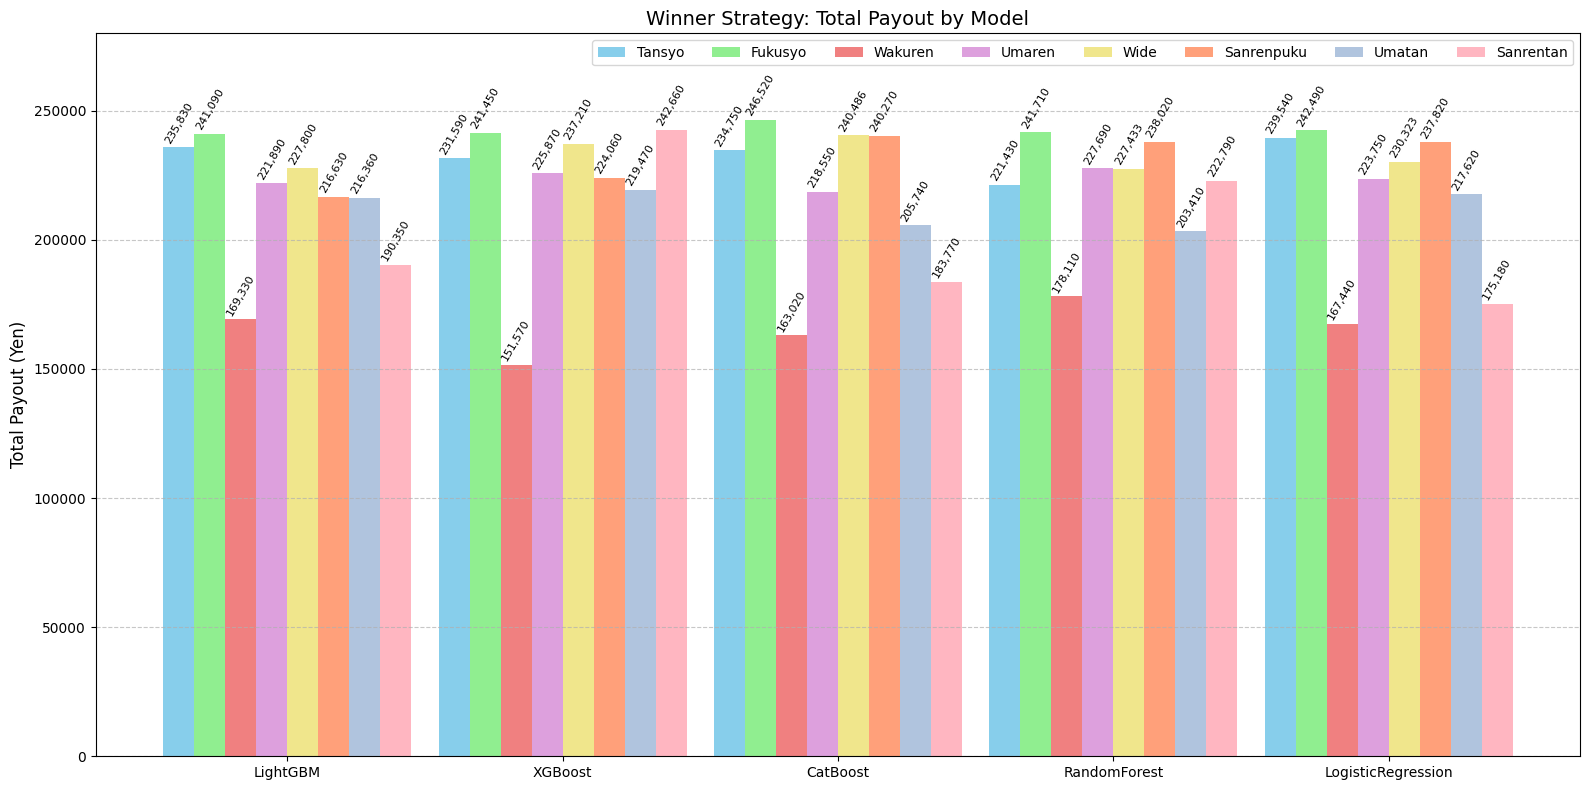

In [97]:
# 1. Extract data
rows = []
for model_name in results_winner_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_winner_tansyo[model_name]["total_payout"],
        "Fukusyo": results_winner_fukusyo[model_name]["total_payout"],
        "Wakuren": results_winner_wakuren[model_name]["total_payout"],
        "Umaren": results_winner_umaren[model_name]["total_payout"],
        "Wide": results_winner_wide[model_name]["total_payout"],
        "Sanrenpuku": results_winner_sanrenpuku[model_name]["total_payout"],
        "Umatan": results_winner_umatan[model_name]["total_payout"],
        "Sanrentan": results_winner_sanrentan[model_name]["total_payout"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. Formatting
plt.title("Winner Strategy: Total Payout by Model", fontsize=14)
plt.ylabel("Total Payout (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(0, 280000)
plt.show()

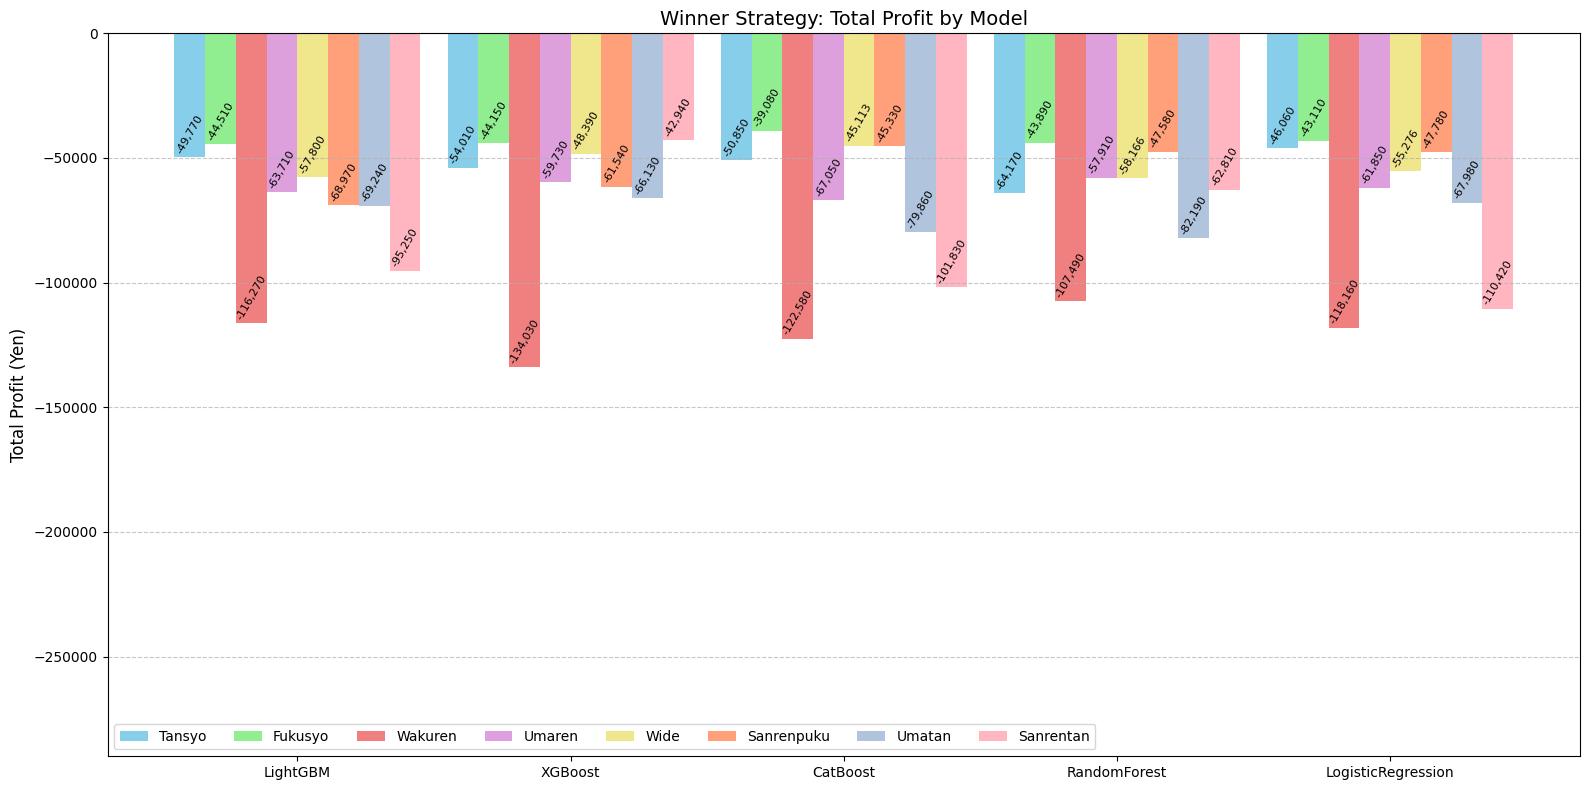

In [103]:
# 1. Extract data
rows = []
for model_name in results_winner_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_winner_tansyo[model_name]["profit"],
        "Fukusyo": results_winner_fukusyo[model_name]["profit"],
        "Wakuren": results_winner_wakuren[model_name]["profit"],
        "Umaren": results_winner_umaren[model_name]["profit"],
        "Wide": results_winner_wide[model_name]["profit"],
        "Sanrenpuku": results_winner_sanrenpuku[model_name]["profit"],
        "Umatan": results_winner_umatan[model_name]["profit"],
        "Sanrentan": results_winner_sanrentan[model_name]["profit"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. Formatting
plt.title("Winner Strategy: Total Profit by Model", fontsize=14)
plt.ylabel("Total Profit (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(-290000, 0)
plt.show()

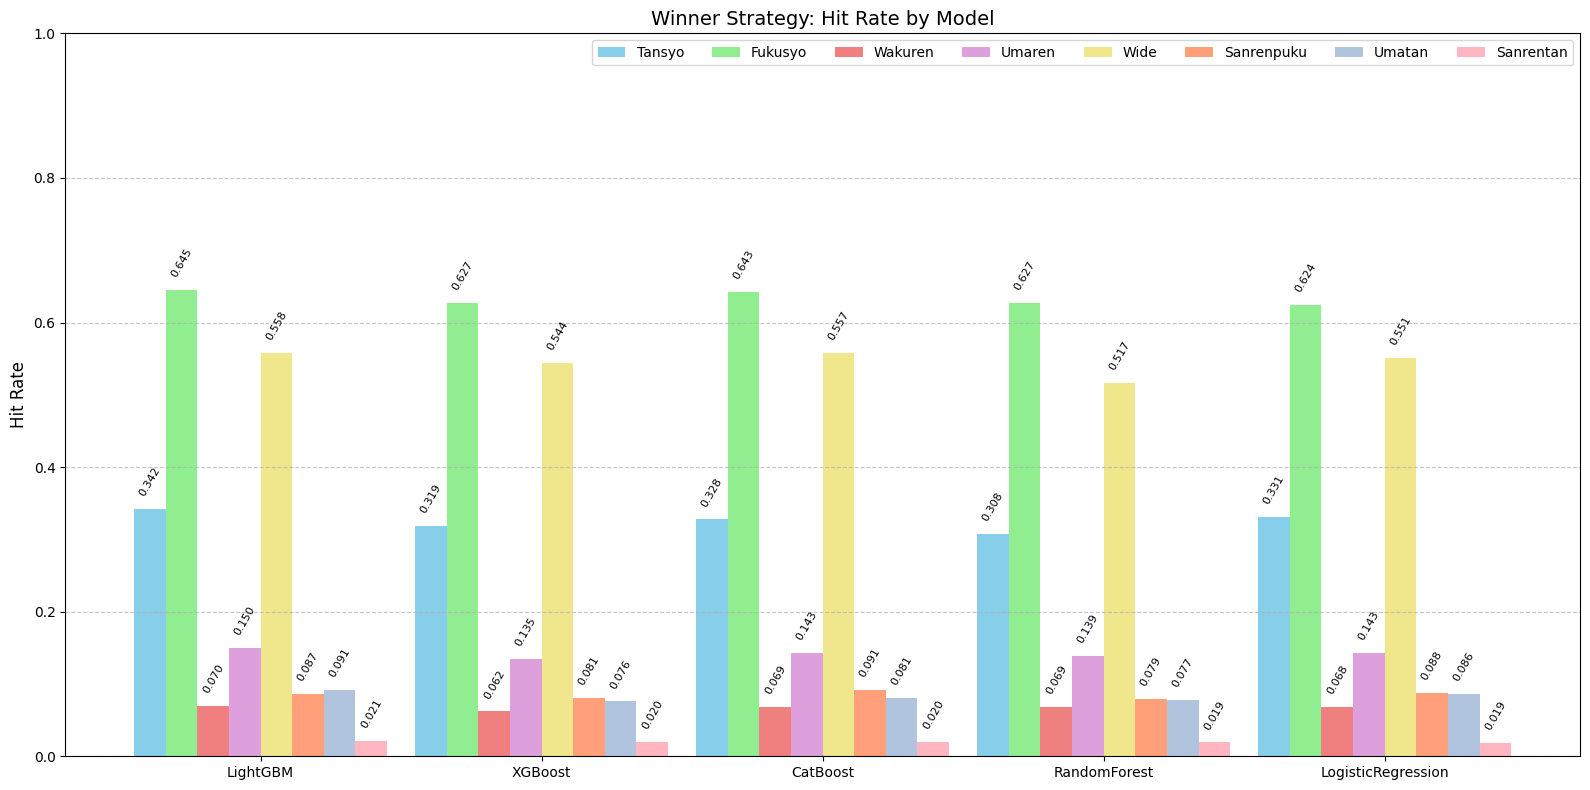

In [92]:
# 1. Extract data
rows = []
for model_name in results_winner_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_winner_tansyo[model_name]["hit_rate"],
        "Fukusyo": results_winner_fukusyo[model_name]["hit_rate"],
        "Wakuren": results_winner_wakuren[model_name]["hit_rate"],
        "Umaren": results_winner_umaren[model_name]["hit_rate"],
        "Wide": results_winner_wide[model_name]["hit_rate"],
        "Sanrenpuku": results_winner_sanrenpuku[model_name]["hit_rate"],
        "Umatan": results_winner_umatan[model_name]["hit_rate"],
        "Sanrentan": results_winner_sanrentan[model_name]["hit_rate"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. Formatting
plt.title("Winner Strategy: Hit Rate by Model", fontsize=14)
plt.ylabel("Hit Rate", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 60 degrees, FIXED offset)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.015,          # <-- FIX: small offset for hit rates
            f"{yval:.3f}",         # <-- FIX: show decimals
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

In [90]:
print (results_ranking_tansyo)

{'LightGBM': {'mrr': np.float64(0.23894375929611483), 'total_payout': np.int64(243610), 'profit': np.int64(-41990), 'return_rate': np.float64(0.8529761904761904), 'hit_rate': np.float64(0.34068627450980393)}, 'XGBoost': {'mrr': np.float64(0.23509952783638366), 'total_payout': np.int64(241660), 'profit': np.int64(-43940), 'return_rate': np.float64(0.8461484593837535), 'hit_rate': np.float64(0.33718487394957986)}, 'CatBoost': {'mrr': np.float64(0.2360619982929327), 'total_payout': np.int64(236020), 'profit': np.int64(-49580), 'return_rate': np.float64(0.8264005602240896), 'hit_rate': np.float64(0.33753501400560226)}, 'RandomForest': {'mrr': np.float64(0.23732307688840745), 'total_payout': np.int64(239150), 'profit': np.int64(-46450), 'return_rate': np.float64(0.8373599439775911), 'hit_rate': np.float64(0.3434873949579832)}}


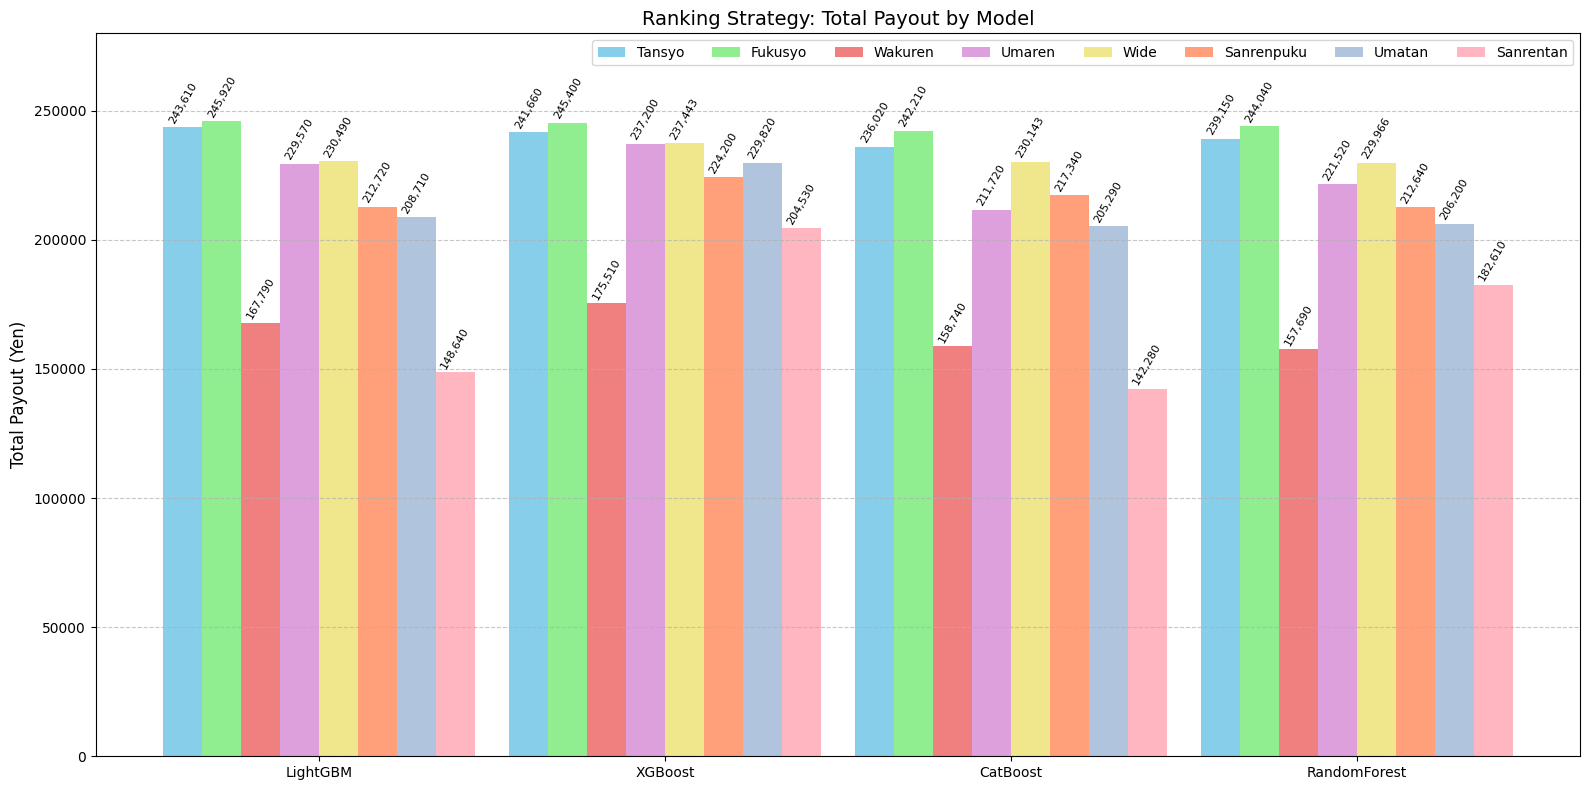

In [95]:
# 1. Extract data
rows = []
for model_name in results_ranking_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_ranking_tansyo[model_name]["total_payout"],
        "Fukusyo": results_ranking_fukusyo[model_name]["total_payout"],
        "Wakuren": results_ranking_wakuren[model_name]["total_payout"],
        "Umaren": results_ranking_umaren[model_name]["total_payout"],
        "Wide": results_ranking_wide[model_name]["total_payout"],
        "Sanrenpuku": results_ranking_sanrenpuku[model_name]["total_payout"],
        "Umatan": results_ranking_umatan[model_name]["total_payout"],
        "Sanrentan": results_ranking_sanrentan[model_name]["total_payout"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. FormatRting
plt.title("Ranking Strategy: Total Payout by Model", fontsize=14)
plt.ylabel("Total Payout (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(0, 280000)
plt.show()

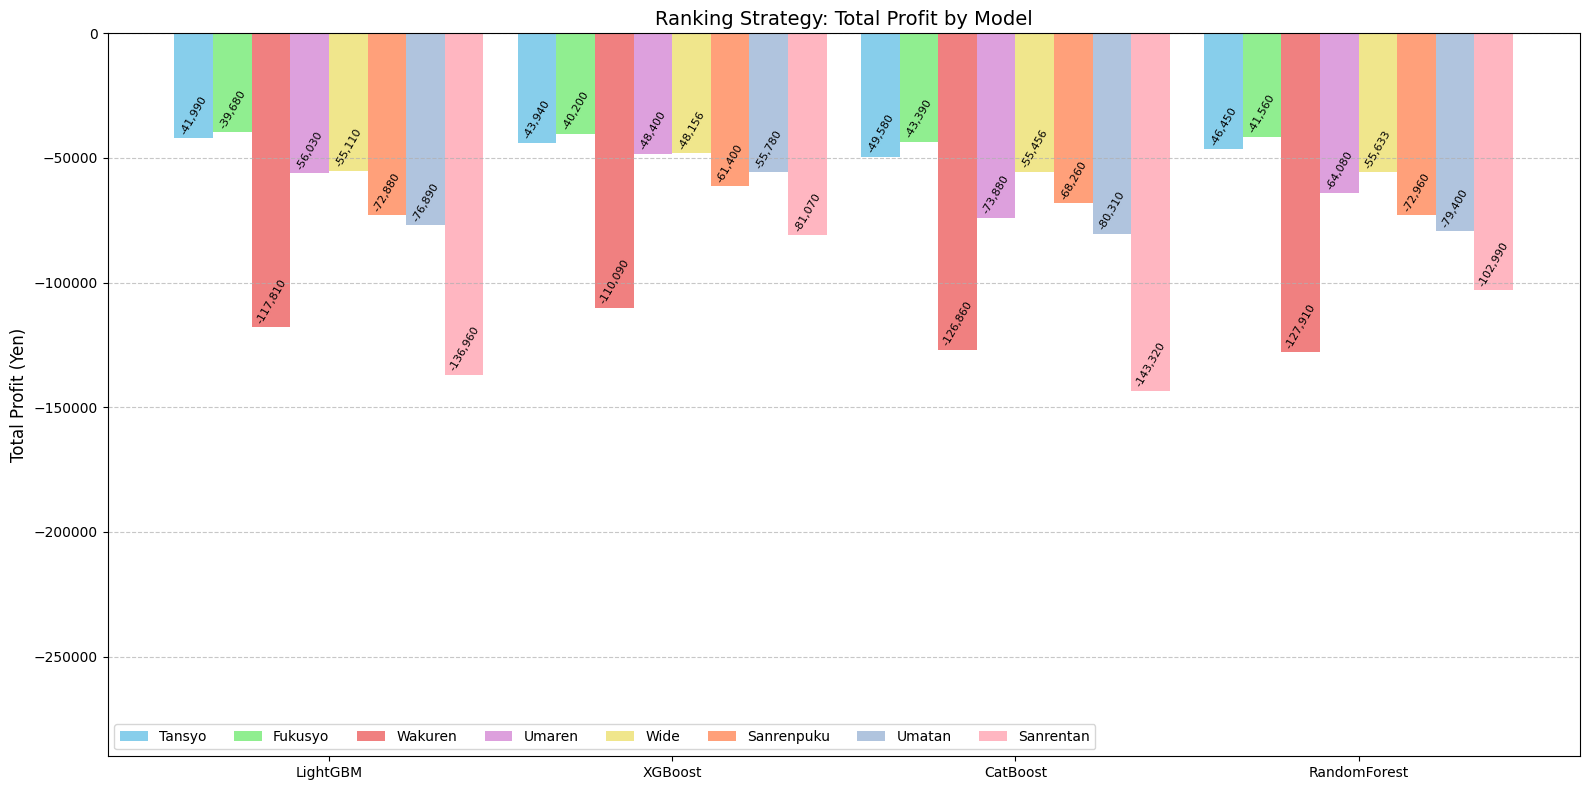

In [102]:
# 1. Extract data
rows = []
for model_name in results_ranking_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_ranking_tansyo[model_name]["profit"],
        "Fukusyo": results_ranking_fukusyo[model_name]["profit"],
        "Wakuren": results_ranking_wakuren[model_name]["profit"],
        "Umaren": results_ranking_umaren[model_name]["profit"],
        "Wide": results_ranking_wide[model_name]["profit"],
        "Sanrenpuku": results_ranking_sanrenpuku[model_name]["profit"],
        "Umatan": results_ranking_umatan[model_name]["profit"],
        "Sanrentan": results_ranking_sanrentan[model_name]["profit"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. FormatRting
plt.title("Ranking Strategy: Total Profit by Model", fontsize=14)
plt.ylabel("Total Profit (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(-290000, 0)
plt.show()

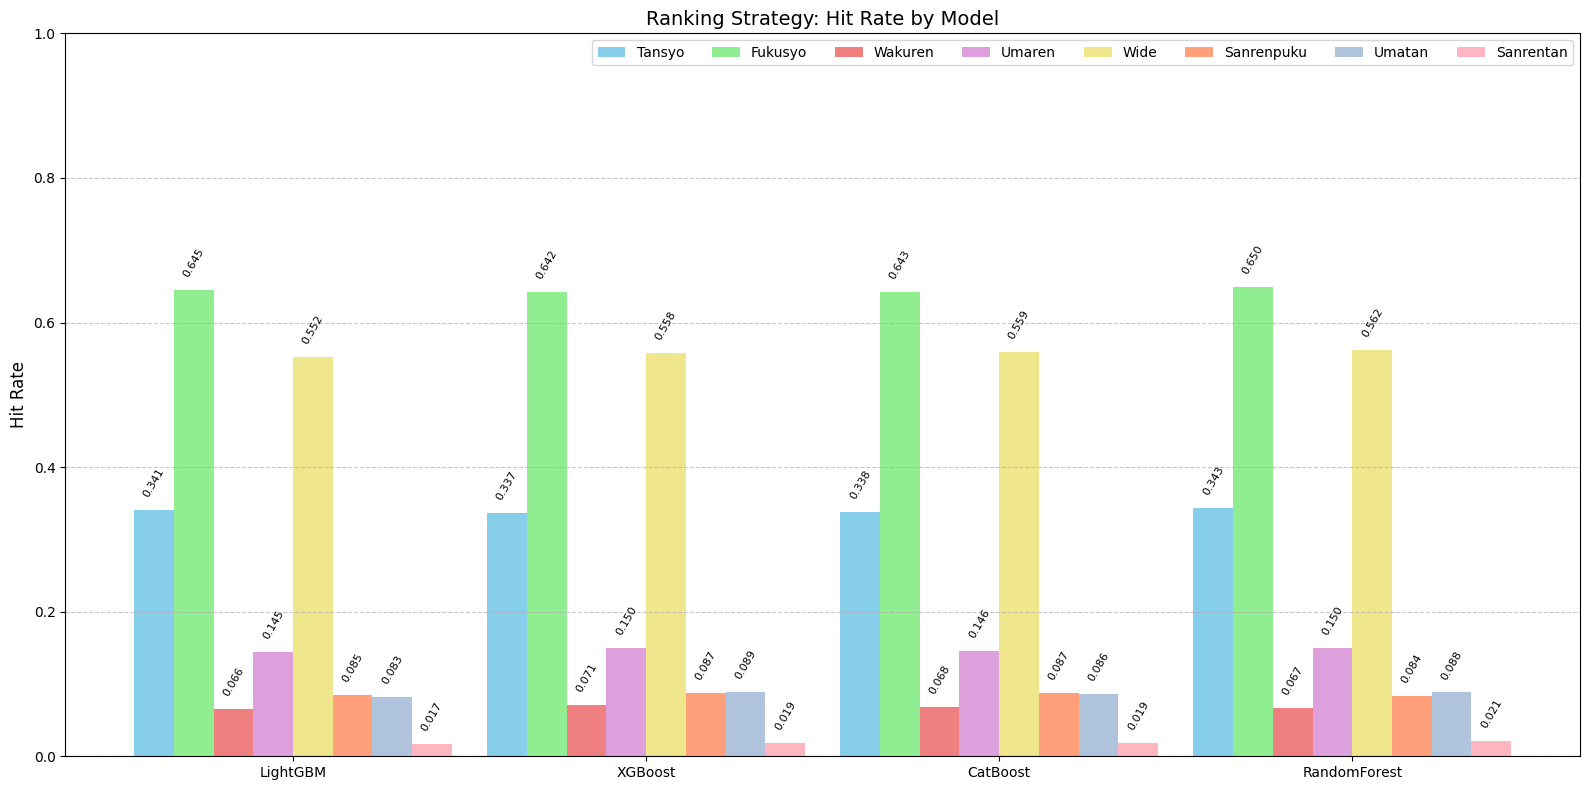

In [91]:
# 1. Extract data
rows = []
for model_name in results_ranking_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_ranking_tansyo[model_name]["hit_rate"],
        "Fukusyo": results_ranking_fukusyo[model_name]["hit_rate"],
        "Wakuren": results_ranking_wakuren[model_name]["hit_rate"],
        "Umaren": results_ranking_umaren[model_name]["hit_rate"],
        "Wide": results_ranking_wide[model_name]["hit_rate"],
        "Sanrenpuku": results_ranking_sanrenpuku[model_name]["hit_rate"],
        "Umatan": results_ranking_umatan[model_name]["hit_rate"],
        "Sanrentan": results_ranking_sanrentan[model_name]["hit_rate"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. FormatRting
plt.title("Ranking Strategy: Hit Rate by Model", fontsize=14)
plt.ylabel("Hit Rate", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 60 degrees, FIXED offset)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.015,          # <-- FIX: small offset for hit rates
            f"{yval:.3f}",         # <-- FIX: show decimals
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

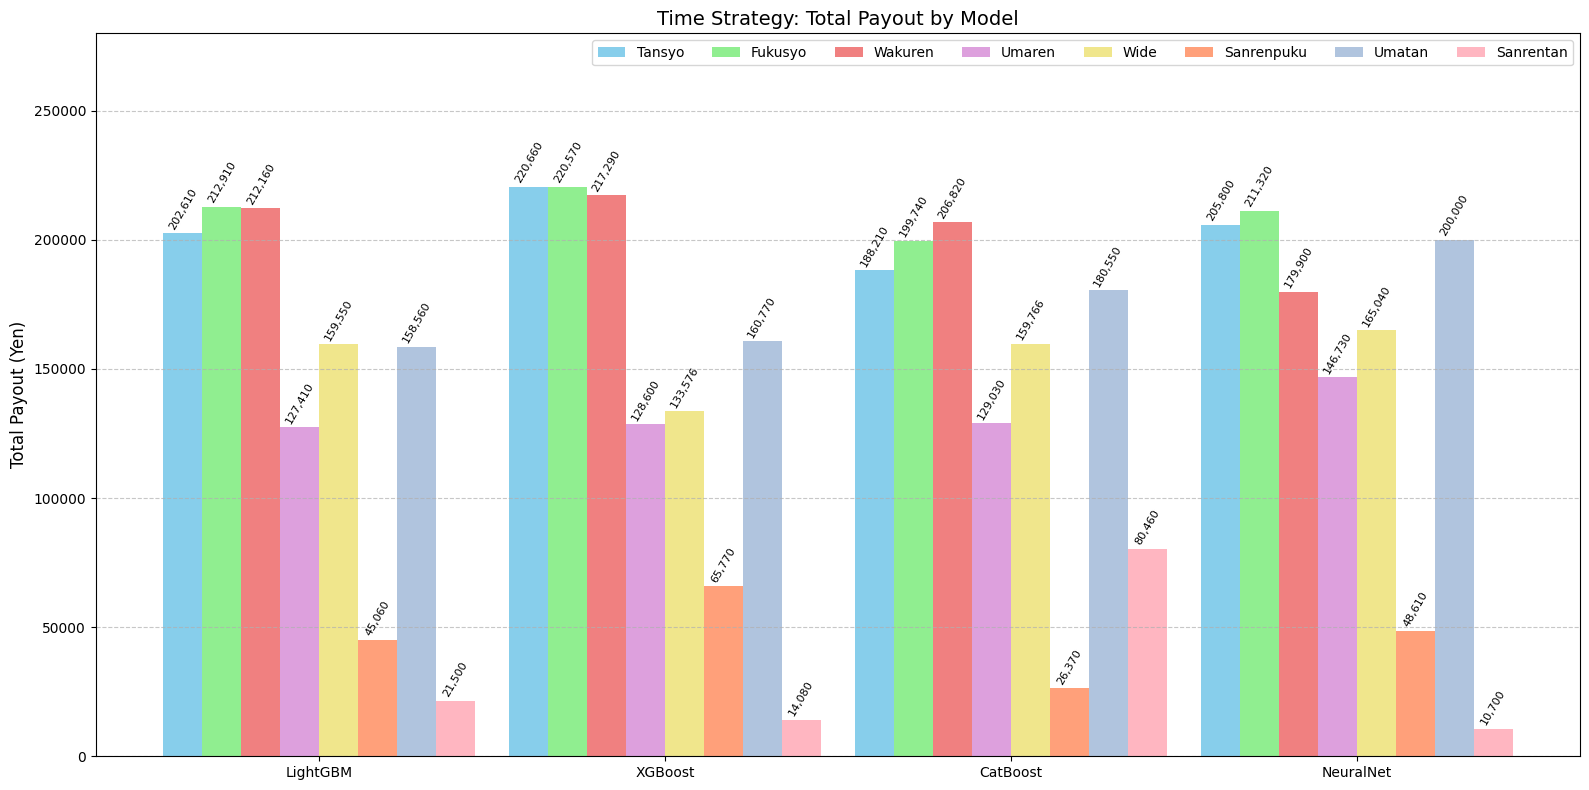

In [96]:
# 1. Extract data
rows = []
for model_name in results_time_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_time_tansyo[model_name]["total_payout"],
        "Fukusyo": results_time_fukusyo[model_name]["total_payout"],
        "Wakuren": results_time_wakuren[model_name]["total_payout"],
        "Umaren": results_time_umaren[model_name]["total_payout"],
        "Wide": results_time_wide[model_name]["total_payout"],
        "Sanrenpuku": results_time_sanrenpuku[model_name]["total_payout"],
        "Umatan": results_time_umatan[model_name]["total_payout"],
        "Sanrentan": results_time_sanrentan[model_name]["total_payout"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. FormatRting
plt.title("Time Strategy: Total Payout by Model", fontsize=14)
plt.ylabel("Total Payout (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(0, 280000)
plt.show()

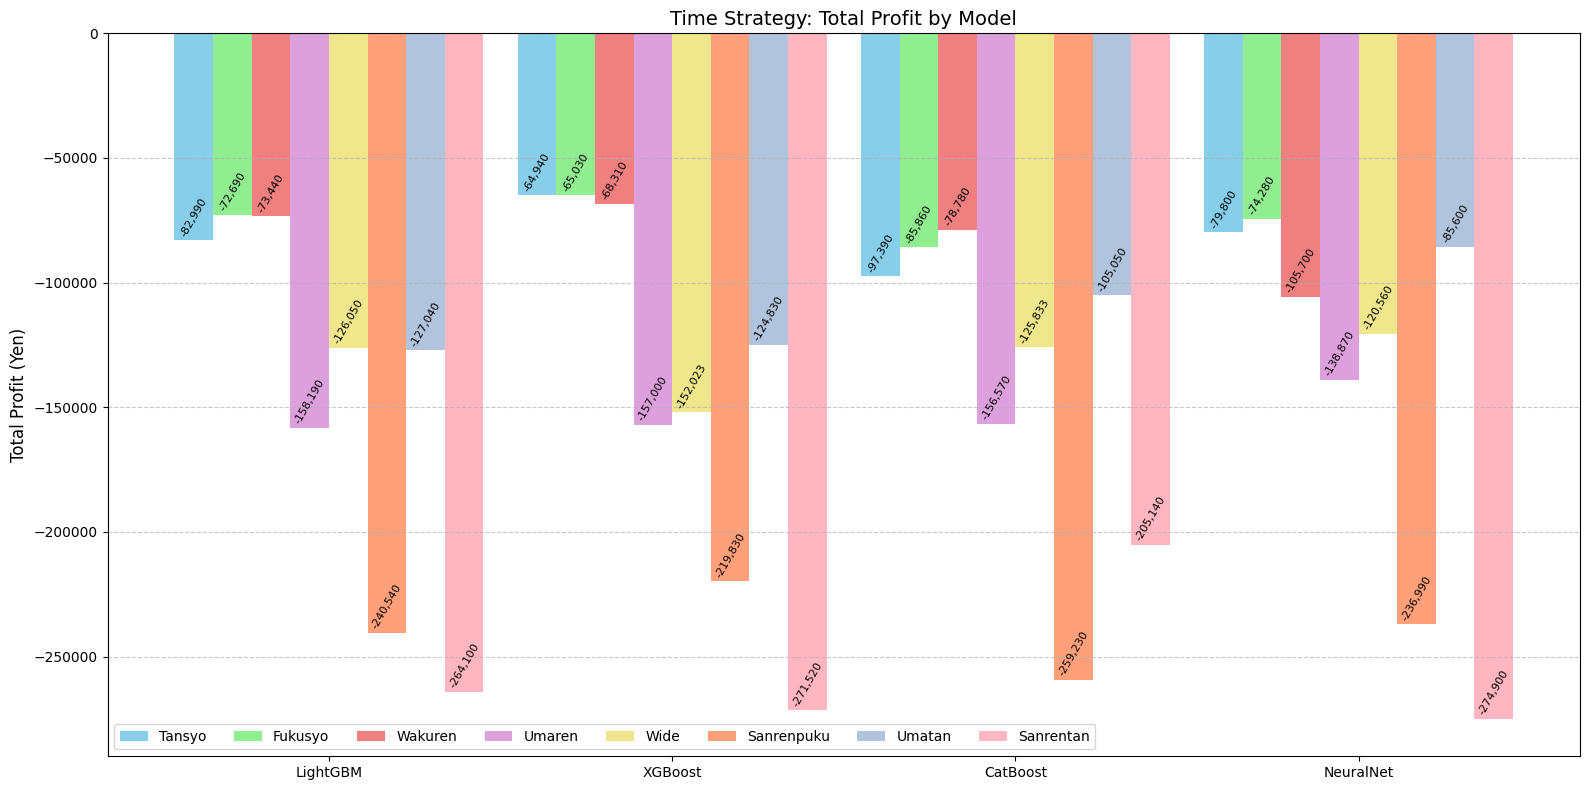

In [101]:
# 1. Extract data
rows = []
for model_name in results_time_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_time_tansyo[model_name]["profit"],
        "Fukusyo": results_time_fukusyo[model_name]["profit"],
        "Wakuren": results_time_wakuren[model_name]["profit"],
        "Umaren": results_time_umaren[model_name]["profit"],
        "Wide": results_time_wide[model_name]["profit"],
        "Sanrenpuku": results_time_sanrenpuku[model_name]["profit"],
        "Umatan": results_time_umatan[model_name]["profit"],
        "Sanrentan": results_time_sanrentan[model_name]["profit"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. FormatRting
plt.title("Time Strategy: Total Profit by Model", fontsize=14)
plt.ylabel("Total Profit (Yen)", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 45 degrees)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 800,
            f"{int(yval):,}",
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(-290000, 0)
plt.show()

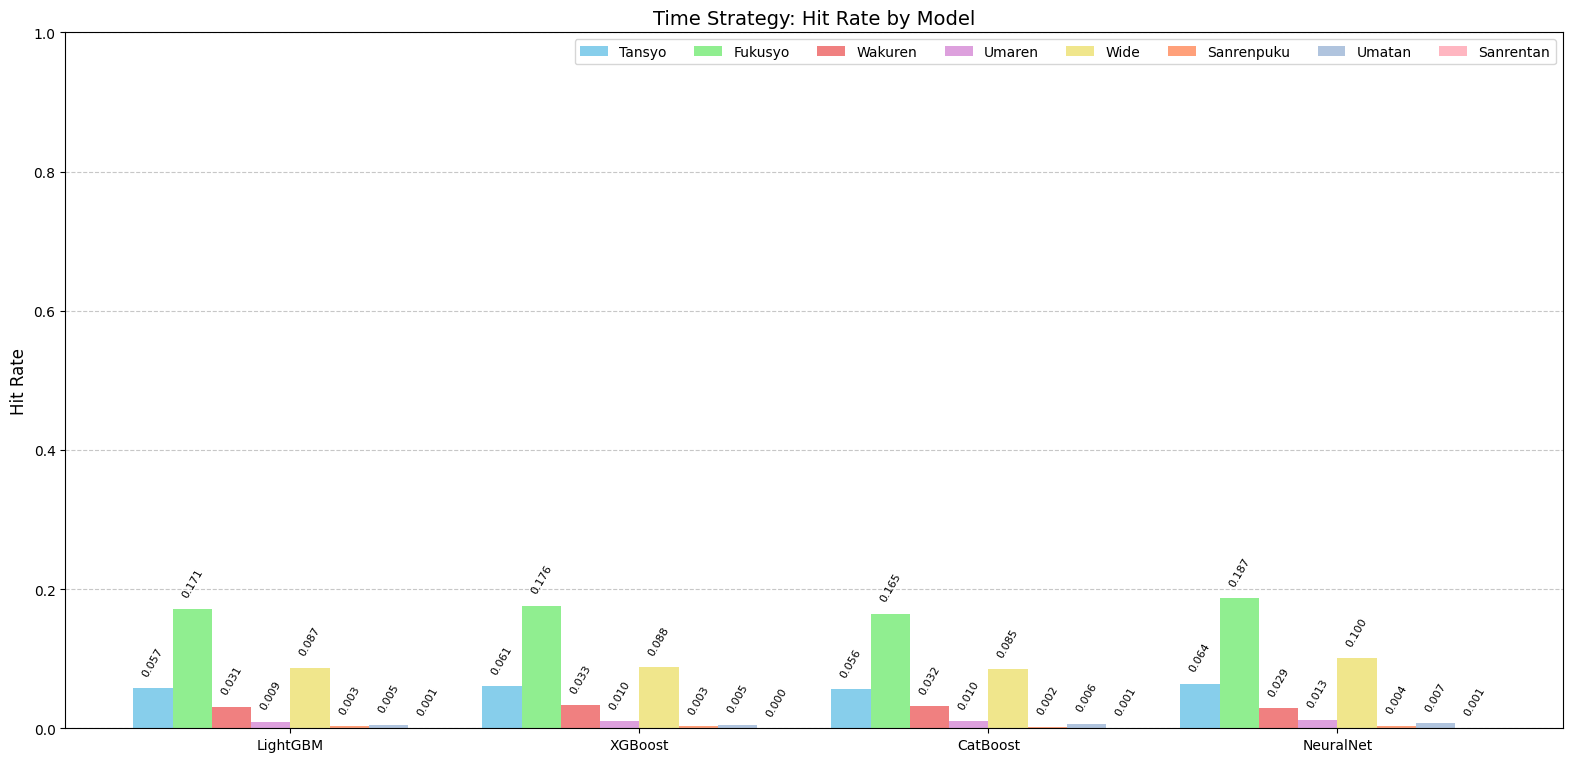

In [94]:
# 1. Extract data
rows = []
for model_name in results_time_tansyo.keys():
    rows.append({
        "Model": model_name,
        "Tansyo": results_time_tansyo[model_name]["hit_rate"],
        "Fukusyo": results_time_fukusyo[model_name]["hit_rate"],
        "Wakuren": results_time_wakuren[model_name]["hit_rate"],
        "Umaren": results_time_umaren[model_name]["hit_rate"],
        "Wide": results_time_wide[model_name]["hit_rate"],
        "Sanrenpuku": results_time_sanrenpuku[model_name]["hit_rate"],
        "Umatan": results_time_umatan[model_name]["hit_rate"],
        "Sanrentan": results_time_sanrentan[model_name]["hit_rate"],
    })
# 2. DataFrame & sort
df_plot = (
    pd.DataFrame(rows)
    .reset_index(drop=True)
)
# 3. Plot setup
strategies = [
    "Tansyo", "Fukusyo", "Wakuren", "Umaren",
    "Wide", "Sanrenpuku", "Umatan", "Sanrentan"
]
colors = [
    "skyblue", "lightgreen", "lightcoral", "plum",
    "khaki", "lightsalmon", "lightsteelblue", "lightpink"
]
x = np.arange(len(df_plot))
n = len(strategies)
width = 0.9 / n   # total group width = 0.8
plt.figure(figsize=(16, 8))
bars_all = []
# 4. Plot grouped bars
for i, (strategy, color) in enumerate(zip(strategies, colors)):
    offset = (i - n / 2) * width + width / 2
    bars = plt.bar(
        x + offset,
        df_plot[strategy],
        width,
        label=strategy,
        color=color
    )
    bars_all.append(bars)
# 5. FormatRting
plt.title("Time Strategy: Hit Rate by Model", fontsize=14)
plt.ylabel("Hit Rate", fontsize=12)
plt.xticks(x, df_plot["Model"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(ncol=8)
# 6. Numeric labels (rotated 60 degrees, FIXED offset)
for bars in bars_all:
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval + 0.015,          # <-- FIX: small offset for hit rates
            f"{yval:.3f}",         # <-- FIX: show decimals
            ha="center",
            va="bottom",
            fontsize=8,
            rotation=60
        )
plt.tight_layout()
plt.ylim(0, 1)
plt.show()